# Data Exploration of ACLED During Ramadan

# Questions: 
## 1) Do violent events worsen around Fridays in Gaza?
## 2) What does the Gaza Siege literature review say about the types of targeting and violence versus epidemiological study, due to occupation ? 

### * Geospatial Analysis: Study highlights bulleted from here https://gh.bmj.com/content/9/4/e014768 
    * Study presents evidence regarding patterns of damage to medical complexes relative to all other buildings in the first month of this conflict.
    * "Methods: This is an observational pre/post-study of damage to buildings during the first month of the Israel Defence Force bombardment of Gaza from 7 October to 7 November 2023. Open-source polygons for the Gaza Strip were spatially joined with building damage assessments from satellite imagery analysis. Medical facilities were included in the analysis if they were cross-referenced by a minimum of two datasets. Logistic regression was used to test for statistically significant differences in the proportions of damaged medical complexes and other buildings."

    * "Results: A total of 167,292 unique buildings were identified, including 106 cross-referenced medical complexes. Approximately 9% of non-medical buildings and medical complexes alike sustained damage during the first month of the bombardment. No difference in the odds of damage was detected between medical complexes and all other buildings (OR: 0.89; 95% CI: 0.45-1.76; p>0.74).
    *1) This geospatial analysis of infrastructure damage sustained in the Gaza Strip from 7 October to 7 November 2023 assessed the proportions of damage to medical complexes and other buildings during the bombardment campaign. The proportion of damage to medical complexes was similar to all other buildings despite their status as protected civilian objects by international humanitarian law. This is the first empirical investigation of the pattern of damage to medical care in the ongoing Israel–Hamas conflict.
    *2) This analysis raises concerns about combatants’ application of the principles of distinction, proportionality and precaution, suggesting the importance of further investigation. Future research may include investigations of damage to medical complexes, as well as other protected civilian infrastructure, over time as new patterns may emerge during this ongoing conflict."
    *"Conclusion There is a lack of evidence of differential damage to medical and non-medical complexes during the first month of the bombing campaign. This finding raises concerns about combatants’ application of the principles of distinction, proportionality and precaution, suggesting the importance of further investigation."
    
### Event Analysis: Flour Massacres
1)February 29th where 118 killed, which was a Thursday
"They noted that the 29 February massacre followed a pattern of Israeli attacks against Palestinian civilians seeking aid, with over 14 recorded incidents of shooting, shelling and targeting groups gathered to receive urgently needed supplies from trucks or airdrops between mid-January and the end of February 2024." Source: https://www.ohchr.org/en/press-releases/2024/03/un-experts-condemn-flour-massacre-urge-israel-end-campaign-starvation-gaza
    
2)Preceded more food queuing attacks

## 3) Is there a significant different between event types that characterizes violent tactics?

## CHALLENGES:
### Missing Data: 
    * Lesson Learned from Transitional Justice experience by Patrick Bell~ Most vulenerable targets may be unaccounted for because when they're not covered as noteworthy individuals by the news. HRDAG's proposed solution to apply multiple systems estimation (MSE), which estimates activists not enumerated. Source for explaining unaccounted:  https://hrdag.org/2023/06/05/making-missing-data-visible-in-colombia/
    Source for MSE: https://hrdag.org/2013/03/13/mse-collection-cleaning-canonicalization-data/

## PLAN: 
### *Phase 2: Explore Individual Features*

*Numerical Features (e.g., fatalities, population_best): Use histograms, boxplots, or scatter plots to visualize distributions and identify patterns.

*Categorical Features (e.g., disorder_type, event_type): Use bar plots to visualize the frequency of different categories.

*Explore Relationships:

*Pairwise Relationships: Use scatter plots or pair plots to visualize relationships between pairs of numerical features.

*Categorical vs. Numerical: Use boxplots or violin plots to visualize how numerical features vary across different categories of categorical features.

*Categorical vs. Categorical: Use contingency tables or heatmaps to visualize the frequency of combinations of categories.

*Time Series Analysis:

*Geospatial Analysis:
Visualize the spatial distribution of events on a map.

### *Phase 3: Hypothesis Testing
Impact of Event Types on Fatalities:

Null Hypothesis (H0): There is no significant difference in fatalities across different event types (e.g., battles, protests, riots).
Alternative Hypothesis (H1): There is a significant difference in fatalities across different event types.
Test: Conduct ANOVA or a suitable non-parametric test to compare fatalities across event types.
Association between Actors and Fatalities:

Null Hypothesis (H0): There is no significant difference in fatalities caused by different actors (e.g., government forces, rebel groups, civilians).
Alternative Hypothesis (H1): There is a significant difference in fatalities caused by different actors.
Test: Perform ANOVA or a suitable non-parametric test to compare fatalities caused by different actors.
Effect of Time Precision on Data Accuracy:

Null Hypothesis (H0): There is no significant difference in the accuracy of data reporting (as indicated by time precision) across different event types.
Alternative Hypothesis (H1): There is a significant difference in the accuracy of data reporting across different event types.
Test: Conduct a chi-square test or logistic regression to assess the association between time precision and event types.
Temporal Trends in Conflict Intensity:

Null Hypothesis (H0): There is no significant difference in the number of fatalities over time.
Alternative Hypothesis (H1): There is a significant difference in the number of fatalities over time.
Test: Use time-series analysis techniques such as ARIMA or Seasonal Decomposition to identify temporal trends in conflict intensity.
Spatial Distribution of Conflict Events:

Null Hypothesis (H0): There is no significant difference in the spatial distribution of conflict events across different regions within Palestine.
Alternative Hypothesis (H1): There is a significant difference in the spatial distribution of conflict events across different regions within Palestine.
Test: Conduct spatial analysis techniques such as spatial autocorrelation or spatial clustering analysis to examine the spatial patterns of conflict events.

In [1]:
#Import libraries
import pandas as pd
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim 
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

from scipy.signal import find_peaks  # identify peaks in line graph

import folium #Geospatial 
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [4]:
from PIL import Image
from nltk.corpus import stopwords

In [134]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.0/411.0 kB 2.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [4 lines of output]
      /private/var/folders/wd/4jsd59l56qlgwnln795581mc0000gn/T/pip-install-jwryo6ys/fiona_bfc0713db31d4e7e95df105c5f1bf9af/setup.py:86: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
        logging.warn("Failed to get options via gdal-config: %s", str(e))
      CRITICAL:root:A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfull

In [14]:
!pip install  fsspec==0.7.4 


The error message you provided suggests that there is an issue with the installation process of a package that requires building a wheel. Specifically, it seems that the package fiona is encountering an error related to GDAL configuration.

Here are some steps you can take to address this issue:

Install GDAL: fiona is a Python wrapper for GDAL (Geospatial Data Abstraction Library), and it requires GDAL to be installed on your system. You can install GDAL using a package manager appropriate for your operating system. For example, on macOS, you can use Homebrew:
bash
Copy code
brew install gdal
On Linux, you can use your package manager (e.g., apt for Ubuntu/Debian):
bash
Copy code
sudo apt-get install gdal-bin
On Windows, you may need to install GDAL binaries manually from the GDAL website: https://gdal.org/download.html
Set GDAL_CONFIG Environment Variable: After installing GDAL, you need to set the GDAL_CONFIG environment variable to point to the gdal-config executable. You can do this by specifying the path to gdal-config in your shell configuration file (e.g., .bashrc, .bash_profile, .zshrc, etc.):
bash
Copy code
export GDAL_CONFIG=/path/to/gdal-config
Replace /path/to/gdal-config with the actual path to the gdal-config executable on your system.
Install the Package Again: After setting the GDAL_CONFIG environment variable, try installing the package (fiona in this case) again using pip:
bash
Copy code
pip install fiona
Verify Installation: Once the installation is complete, verify that the package is installed correctly by importing it in a Python script or shell:
python
Copy code
import fiona
If you don't encounter any errors, the package is installed successfully.
By following these steps, you should be able to resolve the issue with installing the fiona package and address the error related to GDAL configuration. If you encounter any further issues, feel free to ask for assistance!

In [133]:
!pip install --upgrade pip
!pip install --upgrade setuptools

     |████████████████████████████████| 2.1MB 3.1MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 4.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 41.4.0
    Uninstalling setuptools-41.4.0:
      Successfully uninstalled setuptools-41.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
singer-python 5.8.1 requires jsonschema==2.6.0, but you have jsonschema 3.2.0 which is incompatible.
tap-facebook 1.9.1 requires attrs==16.3.0, but you have attrs 20.2.0 which is incompatible.
tap-facebook 1.9.1 req

In [2]:
#Pull in ACLED file 
#elections = pd.read_excel(r'C:/Users⁩/mehrunisaqayyum⁩/Downloads⁩⁩/idea_export_40_63b33c98b0797 2.xlsx') #'C:/Users/mehrunisaqayyum/Downloads/idea_export_40_63b33c98b0797.xls')
acled_file = pd.read_csv("/Users/mehrunisaqayyum/Downloads/2024-03-01-2024-05-01-Middle_East.csv") # https://drive.google.com/file/d/12HnAtKj_IutDbJxaQ_KQmeStReMevOZK/view') # ACLED_MENA_2024-01-01-2024-02-20.csv'
acled_file

event_id_cnty     event_date  year  time_precision       disorder_type  \
0         SYR127072  26 April 2024  2024               1  Political violence   
1          YEM87085  26 April 2024  2024               1  Political violence   
2          YEM87121  26 April 2024  2024               1      Demonstrations   
3          YEM87203  26 April 2024  2024               1      Demonstrations   
4          BHR12724  26 April 2024  2024               1      Demonstrations   
...             ...            ...   ...             ...                 ...   
11756      YEM85896  01 March 2024  2024               1      Demonstrations   
11757      YEM85901  01 March 2024  2024               1      Demonstrations   
11758      IRQ52386  01 March 2024  2024               1  Political violence   
11759      IRQ52435  01 March 2024  2024               1  Political violence   
11760      YEM85890  01 March 2024  2024               1      Demonstrations   

                       event_type                     sub_event_type  \
0      Explosions/Remote violence  Shelling/artillery/missile attack   
1      Explosions/Remote violence  Shelling/artillery/missile attack   
2                        Protests                   Peaceful protest   
3                        Protests                   Peaceful protest   
4                        Protests                   Peaceful protest   
...                           ...                                ...   
11756                    Protests                   Peaceful protest   
11757                    Protests                   Peaceful protest   
11758  Explosions/Remote violence                   Air/drone strike   
11759  Explosions/Remote violence                   Air/drone strike   
11760                    Protests                   Peaceful protest   

                                        actor1  \
0             Military Forces of Syria (2000-)   
1      Military Forces of Yemen (2017-) Houthi   
2                           Protesters (Yemen)   
3                           Protesters (Yemen)   
4                         Protesters (Bahrain)   
...                                        ...   
11756                       Protesters (Yemen)   
11757                       Protesters (Yemen)   
11758        Military Forces of Turkey (2016-)   
11759        Military Forces of Turkey (2016-)   
11760                       Protesters (Yemen)   

                                           assoc_actor_1  inter1  ...  \
0                                                    NaN       1  ...   
1                                                    NaN       1  ...   
2                     Government of Yemen (2017-) Houthi       6  ...   
3                     Government of Yemen (2017-) Houthi       6  ...   
4                            February 14 Youth Coalition       6  ...   
...                                                  ...     ...  ...   
11756                 Government of Yemen (2017-) Houthi       6  ...   
11757  Government of Yemen (2017-) Houthi; Military F...       6  ...   
11758                                                NaN       8  ...   
11759                                                NaN       8  ...   
11760                 Government of Yemen (2017-) Houthi       6  ...   

      latitude longitude  geo_precision  \
0      35.7225   36.2602              1   
1      16.1382   41.4067              3   
2      15.3537   43.5942              1   
3      16.9411   43.5175              2   
4      26.2250   50.5362              1   
...        ...       ...            ...   
11756  16.8584   43.1978              2   
11757  15.4701   43.5448              2   
11758  37.1071   43.5172              2   
11759  37.0394   43.5175              2   
11760  17.1813   43.2881              2   

                                                  source  \
0                                            SHAAM; SOHR   
1      Ansar Allah; The Washington Institute; UKMTO; ...   
2    

In [3]:
#Show columns
acled_file.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'population_best'],
      dtype='object')

In [4]:
#What's geo_precision
acled_file['geo_precision'].unique()

array([1, 3, 2])

In [5]:
acled_file['geo_precision'].describe()

count    11761.000000
mean         1.471899
std          0.542023
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: geo_precision, dtype: float64

In [ ]:
#What's correlation between acled_file's 'geo_precision' and 'sub_event_type'
acled_file['geo_precision']

# Pre-Process

In [7]:
#2) Convert to datetime for data analysis
acled_file['event_date'] = pd.to_datetime(acled_file['event_date'])
acled_file['event_date'] 

0       2024-04-26
1       2024-04-26
2       2024-04-26
3       2024-04-26
4       2024-04-26
           ...    
11756   2024-03-01
11757   2024-03-01
11758   2024-03-01
11759   2024-03-01
11760   2024-03-01
Name: event_date, Length: 11761, dtype: datetime64[ns]

In [8]:
#3) Aggregate data by daily time intervals 
daily_events = acled_file.groupby(pd.Grouper(key='event_date', freq='D')).size().reset_index(name='count')
daily_events

event_date  count
0  2024-03-01    248
1  2024-03-02    235
2  2024-03-03    179
3  2024-03-04    205
4  2024-03-05    243
5  2024-03-06    179
6  2024-03-07    172
7  2024-03-08    308
8  2024-03-09    218
9  2024-03-10    213
10 2024-03-11    176
11 2024-03-12    188
12 2024-03-13    164
13 2024-03-14    172
14 2024-03-15    279
15 2024-03-16    249
16 2024-03-17    224
17 2024-03-18    188
18 2024-03-19    193
19 2024-03-20    180
20 2024-03-21    169
21 2024-03-22    293
22 2024-03-23    200
23 2024-03-24    213
24 2024-03-25    168
25 2024-03-26    214
26 2024-03-27    185
27 2024-03-28    169
28 2024-03-29    310
29 2024-03-30    221
30 2024-03-31    201
31 2024-04-01    199
32 2024-04-02    226
33 2024-04-03    199
34 2024-04-04    176
35 2024-04-05    443
36 2024-04-06    221
37 2024-04-07    156
38 2024-04-08    171
39 2024-04-09    135
40 2024-04-10    143
41 2024-04-11    106
42 2024-04-12    176
43 2024-04-13    213
44 2024-04-14    272
45 2024-04-15    187
46 2024-04-16    200
47 2024-04-17    178
48 2024-04-18    152
49 2024-04-19    307
50 2024-04-20    180
51 2024-04-21    199
52 2024-04-22    176
53 2024-04-23    194
54 2024-04-24    186
55 2024-04-25    153
56 2024-04-26    257

## Step 4) Handle missing data (if any) 

In [9]:
#fill in missing data
daily_events = daily_events.fillna(0)
daily_events

event_date  count
0  2024-03-01    248
1  2024-03-02    235
2  2024-03-03    179
3  2024-03-04    205
4  2024-03-05    243
5  2024-03-06    179
6  2024-03-07    172
7  2024-03-08    308
8  2024-03-09    218
9  2024-03-10    213
10 2024-03-11    176
11 2024-03-12    188
12 2024-03-13    164
13 2024-03-14    172
14 2024-03-15    279
15 2024-03-16    249
16 2024-03-17    224
17 2024-03-18    188
18 2024-03-19    193
19 2024-03-20    180
20 2024-03-21    169
21 2024-03-22    293
22 2024-03-23    200
23 2024-03-24    213
24 2024-03-25    168
25 2024-03-26    214
26 2024-03-27    185
27 2024-03-28    169
28 2024-03-29    310
29 2024-03-30    221
30 2024-03-31    201
31 2024-04-01    199
32 2024-04-02    226
33 2024-04-03    199
34 2024-04-04    176
35 2024-04-05    443
36 2024-04-06    221
37 2024-04-07    156
38 2024-04-08    171
39 2024-04-09    135
40 2024-04-10    143
41 2024-04-11    106
42 2024-04-12    176
43 2024-04-13    213
44 2024-04-14    272
45 2024-04-15    187
46 2024-04-16    200
47 2024-04-17    178
48 2024-04-18    152
49 2024-04-19    307
50 2024-04-20    180
51 2024-04-21    199
52 2024-04-22    176
53 2024-04-23    194
54 2024-04-24    186
55 2024-04-25    153
56 2024-04-26    257

## Step 5) Visualize the time series 

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


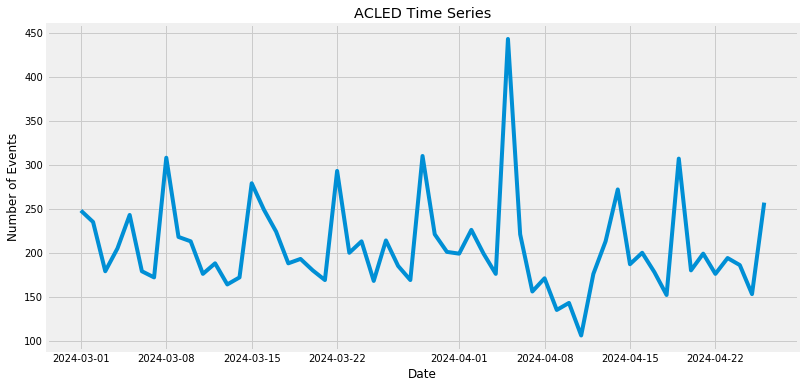

In [10]:
#Visualize Number of Events by DATE
plt.figure(figsize=(12,6))
plt.plot(daily_events['event_date'], daily_events['count']) 
plt.xlabel('Date') 
plt.ylabel('Number of Events') 
plt.title('ACLED Time Series') 
plt.show()

### Observation: Most violent conflict events between March 1 to May 1 of 2024 occured on April 5th.

In [63]:
acled_file['country'].value_counts()

Palestine    3073
Syria        2094
Lebanon      1376
Iraq         1371
Yemen        1330
Turkey        876
Iran          783
Israel        603
Bahrain       157
Jordan         95
Kuwait          3
Name: country, dtype: int64

In [8]:
print(acled_file['country'].unique())

['Syria' 'Yemen' 'Bahrain' 'Iran' 'Iraq' 'Israel' 'Jordan' 'Lebanon'
 'Palestine' 'Turkey' 'Kuwait']


In [11]:
# Aggregate data by country and event type
event_counts_mena = acled_file.groupby([acled_file['event_date'].dt.year, 'country', 'event_type']).size().unstack(fill_value=0)

In [12]:
event_counts_mena  

event_type            Battles  Explosions/Remote violence  Protests  Riots  \
event_date country                                                           
2024       Bahrain          0                           0       133     22   
           Iran            12                           3       732      5   
           Iraq           110                         952        91     13   
           Israel         110                         167       215     30   
           Jordan           1                           0        84      2   
           Kuwait           0                           0         0      0   
           Lebanon         21                        1249        30      9   
           Palestine      348                        1768        75    505   
           Syria          485                         850       276     10   
           Turkey          11                          10       557     55   
           Yemen           80                         125       945      2   

event_type            Strategic developments  Violence against civilians  
event_date country                                                        
2024       Bahrain                         2                           0  
           Iran                           17                          14  
           Iraq                          152                          53  
           Israel                         69                          12  
           Jordan                          8                           0  
           Kuwait                          3                           0  
           Lebanon                        62                           5  
           Palestine                     181                         196  
           Syria                         203                         270  
           Turkey                        229                          14  
           Yemen                          96                          82

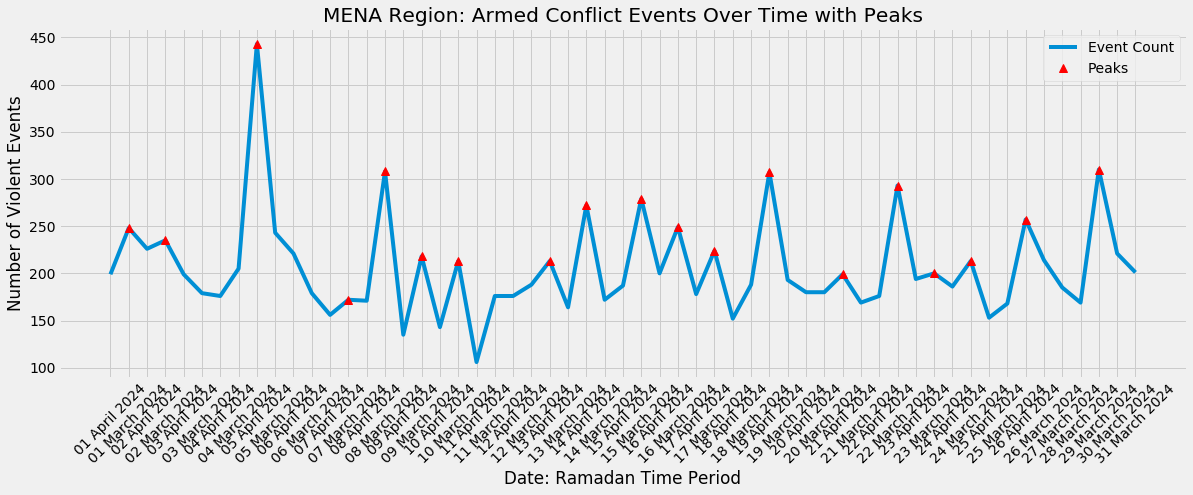

In [144]:
# Aggregate the data (e.g., by date)
aggregated_data = acled_file.groupby(['event_date']).size()

# Identify peaks
peaks, _ = find_peaks(aggregated_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks
plt.figure(figsize=(18, 6))
plt.plot(aggregated_data.index, aggregated_data.values, label='Event Count')
plt.plot(aggregated_data.index[peaks], aggregated_data.values[peaks], 'r^', markersize=8, label='Peaks')
plt.title('MENA Region: Armed Conflict Events Over Time with Peaks')
plt.xlabel('Date: Ramadan Time Period')
plt.ylabel('Number of Violent Events')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Subset of Palestine and Israel

In [13]:
# Filter the data for Israel and Palestine
palestine_israel_data = acled_file[acled_file['country'].isin(['Palestine', 'Israel'])]
palestine_israel_data

event_id_cnty event_date  year  time_precision       disorder_type  \
19         ISR39876 2024-04-26  2024               1      Demonstrations   
20         ISR39919 2024-04-26  2024               1  Political violence   
21         ISR39923 2024-04-26  2024               1      Demonstrations   
22         ISR39938 2024-04-26  2024               1  Political violence   
23         ISR39942 2024-04-26  2024               1      Demonstrations   
...             ...        ...   ...             ...                 ...   
11707      ISR39333 2024-03-01  2024               1  Political violence   
11708      ISR39345 2024-03-01  2024               1  Political violence   
11728      PSE47930 2024-03-01  2024               1  Political violence   
11735      ISR39268 2024-03-01  2024               1  Political violence   
11746      ISR39316 2024-03-01  2024               1  Political violence   

                       event_type                     sub_event_type  \
19                       Protests          Protest with intervention   
20     Violence against civilians                             Attack   
21                       Protests          Protest with intervention   
22     Violence against civilians                             Attack   
23                       Protests                   Peaceful protest   
...                           ...                                ...   
11707  Explosions/Remote violence  Shelling/artillery/missile attack   
11708  Explosions/Remote violence  Shelling/artillery/missile attack   
11728                     Battles                        Armed clash   
11735  Explosions/Remote violence  Shelling/artillery/missile attack   
11746  Explosions/Remote violence  Shelling/artillery/missile attack   

                                        actor1  \
19                         Protesters (Israel)   
20           Unidentified Armed Group (Israel)   
21                         Protesters (Israel)   
22     Tulkarm Youth of Revenge and Liberation   
23                         Protesters (Israel)   
...                                        ...   
11707                                Hezbollah   
11708                                Hezbollah   
11728                             Katibat Jaba   
11735                                Hezbollah   
11746                                Hezbollah   

                                           assoc_actor_1  inter1  ...  \
19     Building an Alternative; Military Forces of Is...       6  ...   
20                            Arab Ethnic Group (Israel)       3  ...   
21     Jewish Group (United States); Protesters (Unit...       6  ...   
22                                                   NaN       3  ...   
23                                                   NaN       6  ...   
...                                                  ...     ...  ...   
11707                                                NaN       3  ...   
11708                                                NaN       3  ...   
11728                            Al Aqsa Martyrs Brigade       3  ...   
11735                                                NaN       3  ...   
11746                                                NaN       3  ...   

      latitude longitude  geo_precision  \
19     32.0956   34.9566              1   
20     31.9292   34.8656              1   
21     31.5602   34.5666              2   
22     32.3331   35.0127              1   
23     31.7455   35.0574              2   
...        ...       ...            ...   
11707  33.0827   35.2838              2   
11708  33.0996   35.2889              2   
11728  32.3241   35.2213              1   
11735  33.0878   35.2284              2   
11746  33.2147   35.5449              2   

                                                  source  \
19     Haaretz; Israel Hayom; Ma'ariv; N12; Srugim; T...   
20     Haaretz; Israel Hayom; Jerusalem Post; N12; Ti...   
21                              Haaretz; Times of Isr

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


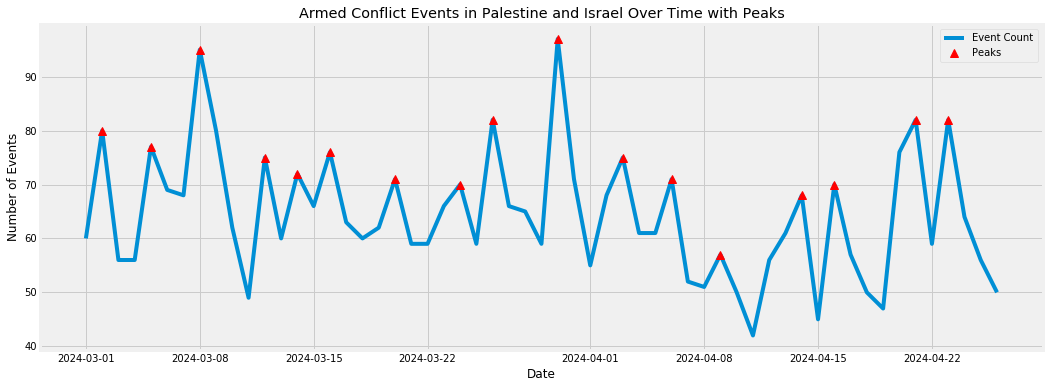

In [14]:
# Aggregate the data (e.g., by date)
agg_palestine_data = palestine_israel_data.groupby(['event_date']).size()

# Identify peaks
p_peaks, _ = find_peaks(agg_palestine_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks
plt.figure(figsize=(16, 6))
plt.plot(agg_palestine_data.index, agg_palestine_data, label='Event Count')
plt.plot(agg_palestine_data.index[p_peaks], agg_palestine_data.values[p_peaks], 'r^', markersize=8, label='Peaks')
plt.title('Armed Conflict Events in Palestine and Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#Subset data without Palestine and Israel
filtered_data = acled_file.drop(acled_file[(acled_file['country'] == 'Israel') | (acled_file['country'] == 'Palestine')].index)
filtered_data # plot this line below Palestine line

event_id_cnty event_date  year  time_precision       disorder_type  \
0         SYR127072 2024-04-26  2024               1  Political violence   
1          YEM87085 2024-04-26  2024               1  Political violence   
2          YEM87121 2024-04-26  2024               1      Demonstrations   
3          YEM87203 2024-04-26  2024               1      Demonstrations   
4          BHR12724 2024-04-26  2024               1      Demonstrations   
...             ...        ...   ...             ...                 ...   
11756      YEM85896 2024-03-01  2024               1      Demonstrations   
11757      YEM85901 2024-03-01  2024               1      Demonstrations   
11758      IRQ52386 2024-03-01  2024               1  Political violence   
11759      IRQ52435 2024-03-01  2024               1  Political violence   
11760      YEM85890 2024-03-01  2024               1      Demonstrations   

                       event_type                     sub_event_type  \
0      Explosions/Remote violence  Shelling/artillery/missile attack   
1      Explosions/Remote violence  Shelling/artillery/missile attack   
2                        Protests                   Peaceful protest   
3                        Protests                   Peaceful protest   
4                        Protests                   Peaceful protest   
...                           ...                                ...   
11756                    Protests                   Peaceful protest   
11757                    Protests                   Peaceful protest   
11758  Explosions/Remote violence                   Air/drone strike   
11759  Explosions/Remote violence                   Air/drone strike   
11760                    Protests                   Peaceful protest   

                                        actor1  \
0             Military Forces of Syria (2000-)   
1      Military Forces of Yemen (2017-) Houthi   
2                           Protesters (Yemen)   
3                           Protesters (Yemen)   
4                         Protesters (Bahrain)   
...                                        ...   
11756                       Protesters (Yemen)   
11757                       Protesters (Yemen)   
11758        Military Forces of Turkey (2016-)   
11759        Military Forces of Turkey (2016-)   
11760                       Protesters (Yemen)   

                                           assoc_actor_1  inter1  ...  \
0                                                    NaN       1  ...   
1                                                    NaN       1  ...   
2                     Government of Yemen (2017-) Houthi       6  ...   
3                     Government of Yemen (2017-) Houthi       6  ...   
4                            February 14 Youth Coalition       6  ...   
...                                                  ...     ...  ...   
11756                 Government of Yemen (2017-) Houthi       6  ...   
11757  Government of Yemen (2017-) Houthi; Military F...       6  ...   
11758                                                NaN       8  ...   
11759                                                NaN       8  ...   
11760                 Government of Yemen (2017-) Houthi       6  ...   

      latitude longitude  geo_precision  \
0      35.7225   36.2602              1   
1      16.1382   41.4067              3   
2      15.3537   43.5942              1   
3      16.9411   43.5175              2   
4      26.2250   50.5362              1   
...        ...       ...            ...   
11756  16.8584   43.1978              2   
11757  15.4701   43.5448              2   
11758  37.1071   43.5172              2   
11759  37.0394   43.5175              2   
11760  17.1813   43.2881              2   

                                                  source  \
0                                            SHAAM; SOHR   
1      Ansar Allah; The Washington Institute; UKMTO; ...   
2      Yemen Data Project; Yemen News Agency (SABA) -

### Subset the data for each country

In [16]:
# Filter the data for Palestine and Israel
palestine_data = acled_file[acled_file['country'] == 'Palestine']
israel_data = acled_file[acled_file['country'] == 'Israel']

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


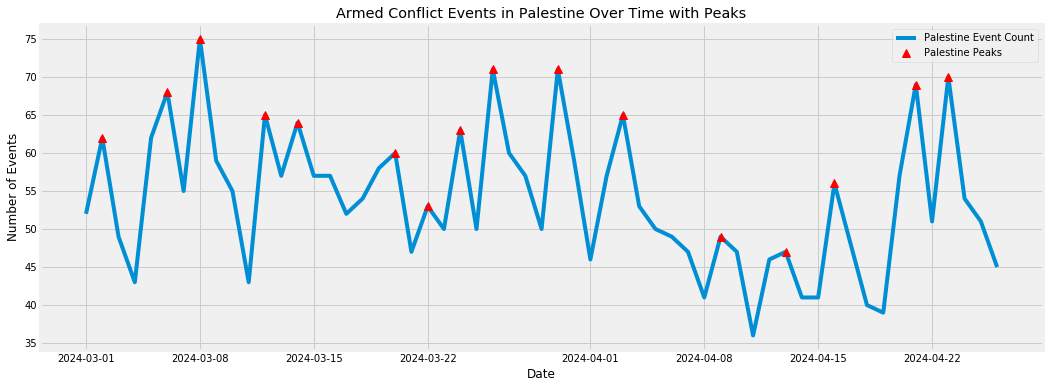

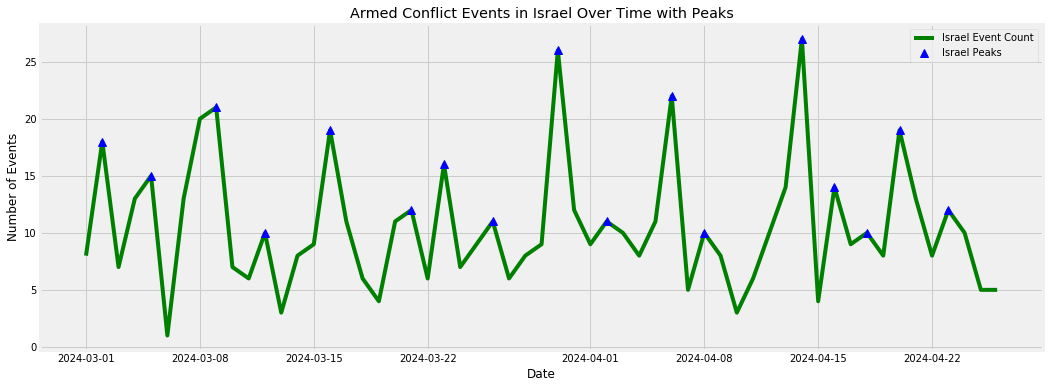

In [17]:
# Aggregate the data (e.g., by date) for Palestine
aggregated_palestine_data = palestine_data.groupby(['event_date']).size()

# Identify peaks for Palestine
peaks_palestine, _ = find_peaks(aggregated_palestine_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks for Palestine
plt.figure(figsize=(16, 6)) #increased from 12
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')
plt.title('Armed Conflict Events in Palestine Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

# Aggregate the data (e.g., by date) for Israel
aggregated_israel_data = israel_data.groupby(['event_date']).size()

# Identify peaks for Israel
peaks_israel, _ = find_peaks(aggregated_israel_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks for Israel
plt.figure(figsize=(16, 6)) #increased from 12
plt.plot(aggregated_israel_data.index, aggregated_israel_data.values, label='Israel Event Count', color='green')
plt.plot(aggregated_israel_data.index[peaks_israel], aggregated_israel_data.values[peaks_israel], 'b^', markersize=8, label='Israel Peaks')
plt.title('Armed Conflict Events in Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

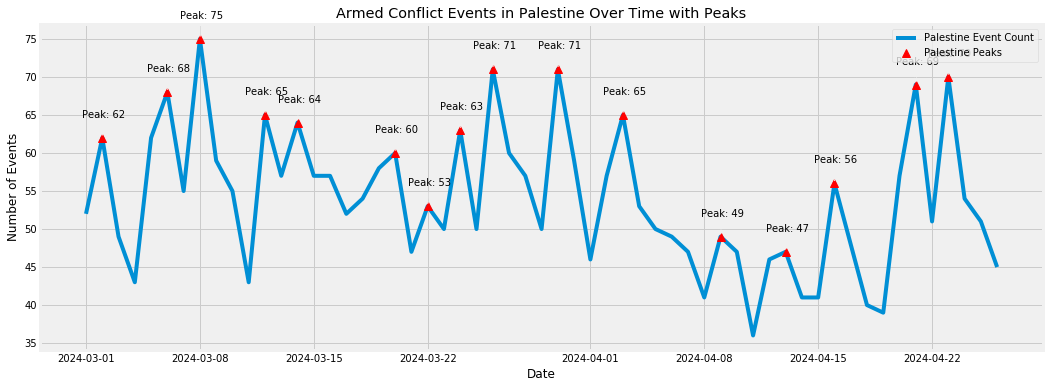

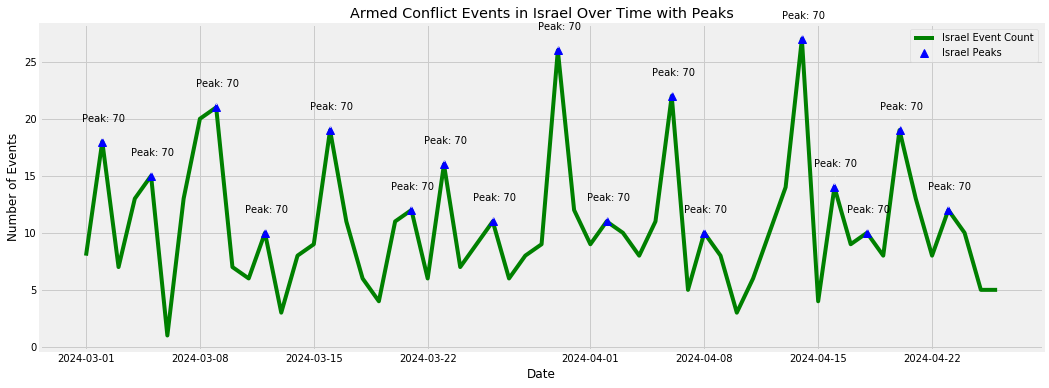

In [18]:
# Test Insert Annotations
#Aggregate the data (e.g., by date) for Palestine
aggregated_palestine_data = palestine_data.groupby(['event_date']).size()

# Identify peaks for Palestine
peaks_palestine, _ = find_peaks(aggregated_palestine_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks for Palestine
plt.figure(figsize=(16, 6)) #increased from 12
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')
plt.title('Armed Conflict Events in Palestine Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)

# Annotate peak points in top line graph for Palestine 
for peak_index in peaks_palestine:
    peak_date = aggregated_palestine_data.index[peak_index]
    peak_value = aggregated_palestine_data.values[peak_index]
    plt.annotate(f'Peak: {peak_value}', xy=(peak_date, peak_value), xytext=(-20, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.show()

# Aggregate the data (e.g., by date) for Israel
aggregated_israel_data = israel_data.groupby(['event_date']).size()

# Identify peaks for Israel
peaks_israel, _ = find_peaks(aggregated_israel_data, height=10)  # Adjust the height threshold as needed

# Visualize the data with peaks for Israel
plt.figure(figsize=(16, 6)) #increased from 12
plt.plot(aggregated_israel_data.index, aggregated_israel_data.values, label='Israel Event Count', color='green')
plt.plot(aggregated_israel_data.index[peaks_israel], aggregated_israel_data.values[peaks_israel], 'b^', markersize=8, label='Israel Peaks')
plt.title('Armed Conflict Events in Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)

# Annotate peak points in bottom line graph for Israel
for peak_index_1 in peaks_israel:
    peak_date_1 = aggregated_israel_data.index[peak_index_1]
    peak_value_1 = aggregated_israel_data.values[peak_index_1]
    plt.annotate(f'Peak: {peak_value}', xy=(peak_date_1, peak_value_1), xytext=(-20, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.show()

## Palestine Versus Israel Event Comparison

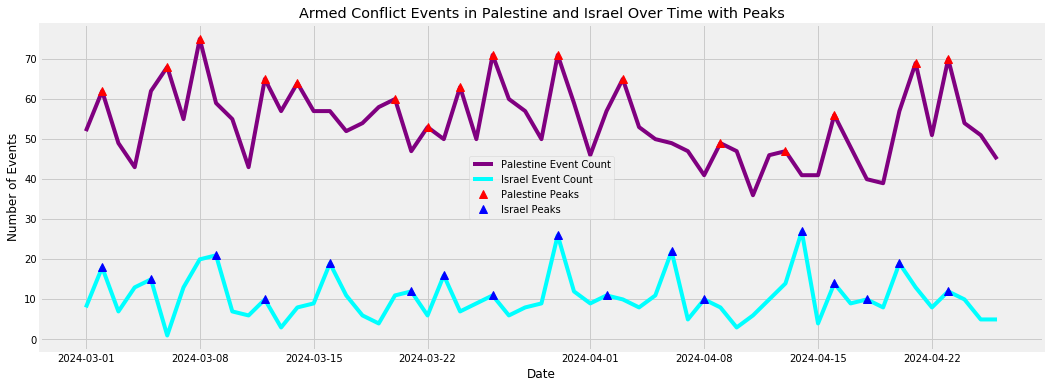

In [19]:
#Same Visual with Both Country Trends in Ramadan
# Visualize the data for Palestine and Israel in the same plot with peaks
plt.figure(figsize=(16, 6))
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count', color='purple')
plt.plot(aggregated_israel_data.index, aggregated_israel_data.values, label='Israel Event Count', color='aqua')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')
plt.plot(aggregated_israel_data.index[peaks_israel], aggregated_israel_data.values[peaks_israel], 'b^', markersize=8, label='Israel Peaks')
plt.title('Armed Conflict Events in Palestine and Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

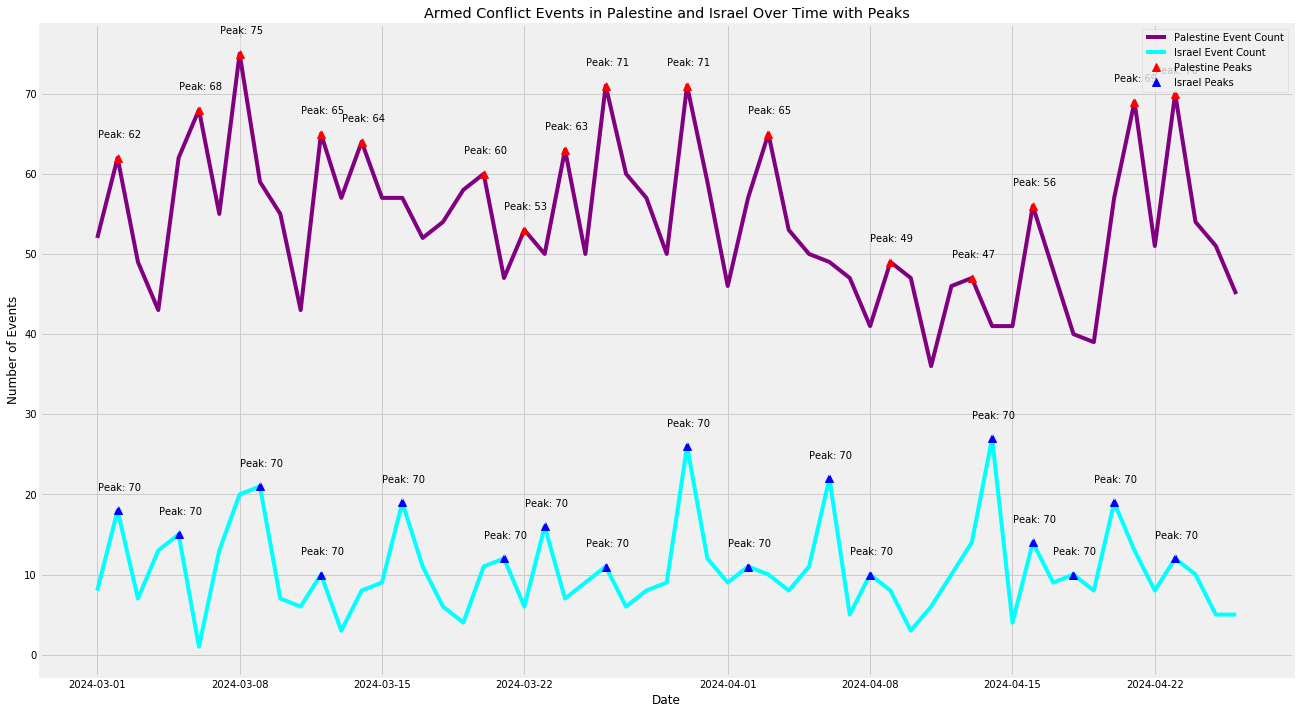

In [20]:
#Same Visual with Both Country Trends in Ramadan
# Visualize the data for Palestine and Israel in the same plot with peaks
plt.figure(figsize=(20, 12))
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count', color='purple')
plt.plot(aggregated_israel_data.index, aggregated_israel_data.values, label='Israel Event Count', color='aqua')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')
plt.plot(aggregated_israel_data.index[peaks_israel], aggregated_israel_data.values[peaks_israel], 'b^', markersize=8, label='Israel Peaks')
plt.title('Armed Conflict Events in Palestine and Israel Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)

# Annotate peak points in top line graph for Palestine 
for peak_index in peaks_palestine:
    peak_date = aggregated_palestine_data.index[peak_index]
    peak_value = aggregated_palestine_data.values[peak_index]
    plt.annotate(f'Peak: {peak_value}', xy=(peak_date, peak_value), xytext=(-20, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
    
# Annotate peak points in bottom line graph for Israel
for peak_index_1 in peaks_israel:
    peak_date_1 = aggregated_israel_data.index[peak_index_1]
    peak_value_1 = aggregated_israel_data.values[peak_index_1]
    plt.annotate(f'Peak: {peak_value}', xy=(peak_date_1, peak_value_1), xytext=(-20, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))    

plt.show()

### Visual: Palestine & MENA without Israel Comparison to Check Fridays 

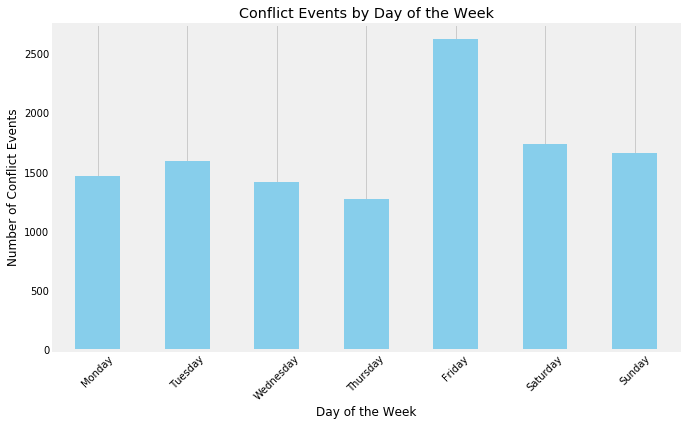

In [21]:
# Load the ACLED dataset into a DataFrame
#acled_data = pd.read_csv("acled_data.csv")

# Preprocess the data
#acled_data['event_date'] = pd.to_datetime(acled_data['event_date'])  # Convert to datetime format

# Extract day of the week
acled_file['day_of_week'] = acled_file['event_date'].dt.day_name()

# Aggregate data by day of the week
conflicts_by_day = acled_file.groupby('day_of_week').size()

# Reorder days of the week for visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
conflicts_by_day = conflicts_by_day.reindex(days_order)

# Visualize conflict data by day of the week
plt.figure(figsize=(10, 6))
conflicts_by_day.plot(kind='bar', color='skyblue')
plt.title('Conflict Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Conflict Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Observation: Top 5 Peaks 

* 1) March 8th, Friday
* 2) April 5th, Friday
* 3) March 22nd, Friday
* 4) March 29th, Friday
* 5) *April 13th, Friday

Fridays: March 15th, March 22nd , March 29th
April 5th, April 12th , April 19th, April 26th

Saturdays: March 16h, March 23, March 30
    April 6, *April 13, *April 20, *April 27th
### Note: * in front of days not in Ramadan

### Visualize Fatalities in Palestine

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


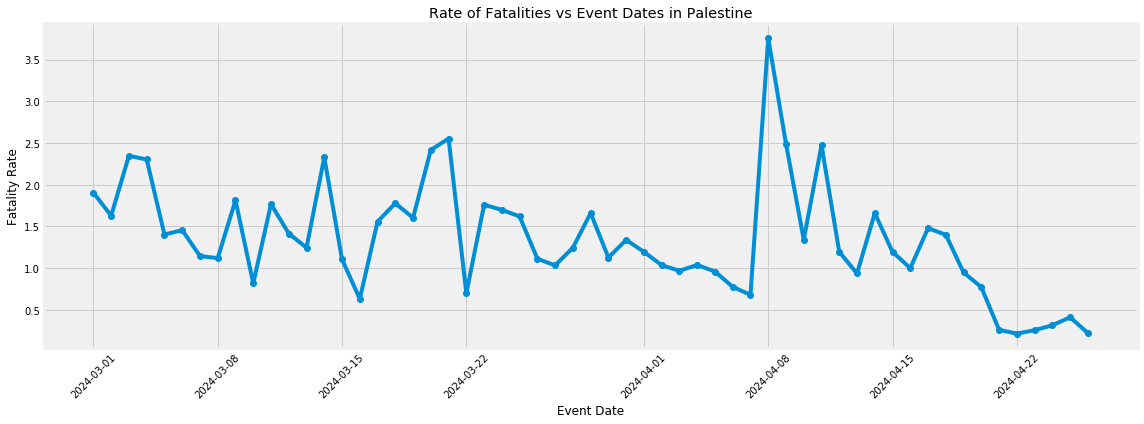

In [23]:
# Filter the data for Palestine
palestine_data_fatal = acled_file[acled_file['country'] == 'Palestine']

# Group the data by event date and calculate the total fatalities and total number of events for each day
grouped_data_p = palestine_data_fatal.groupby('event_date').agg({'fatalities': 'sum', 'event_type': 'count'})
grouped_data_p = grouped_data_p.rename(columns={'event_type': 'total_events'})

# Calculate the rate of fatalities by dividing total fatalities by total events for each day
grouped_data_p['fatality_rate'] = grouped_data_p['fatalities'] / grouped_data_p['total_events']


# Plot the rate of fatalities versus event dates
plt.figure(figsize=(16, 6))
plt.plot(grouped_data_p.index, grouped_data_p['fatality_rate'], marker='o', linestyle='-')
plt.title('Rate of Fatalities vs Event Dates in Palestine')
plt.xlabel('Event Date')
plt.ylabel('Fatality Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

### Correlation Matrix of Features
* Displays relationship between only numerical features

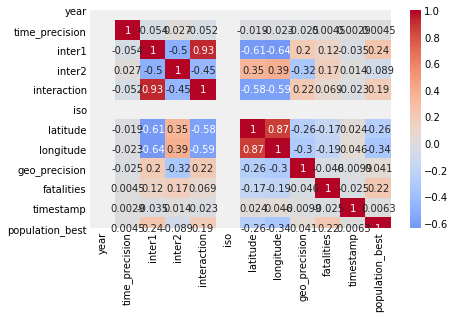

In [25]:
### Use Palestine subset data to create Correlation Matrix of Features
matrix_palestine = palestine_data_fatal.corr()

#visualize the correlation matrix as a heatmap
sns.heatmap(matrix_palestine, annot=True, cmap='coolwarm', center=0)
plt.show()

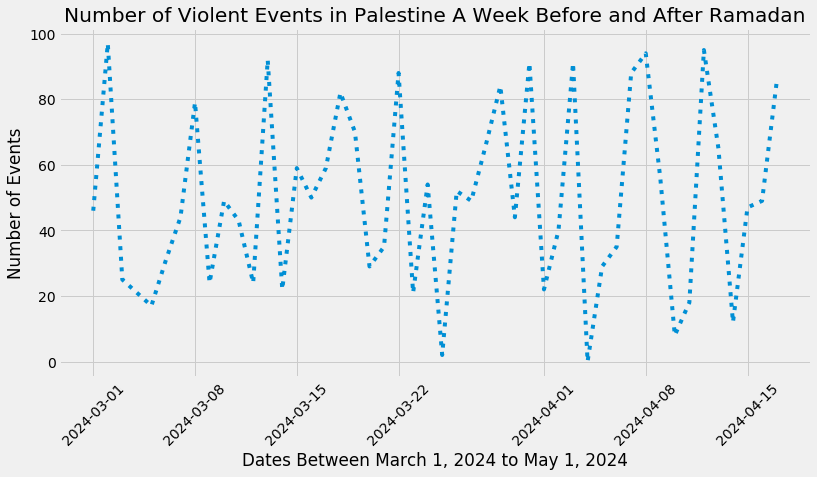

In [254]:
# Time Event data
x = np.arange('2024-03-01', '2024-04-18', dtype='datetime64[D]')
y = np.random.randint(0, 100, size=len(x))

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the line plot
plt.plot(x, y, linestyle = 'dotted')

# Add title and axis labels
plt.title('Number of Violent Events in Palestine A Week Before and After Ramadan')
plt.xlabel('Dates Between March 1, 2024 to May 1, 2024')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)

# Display the plot
plt.show()

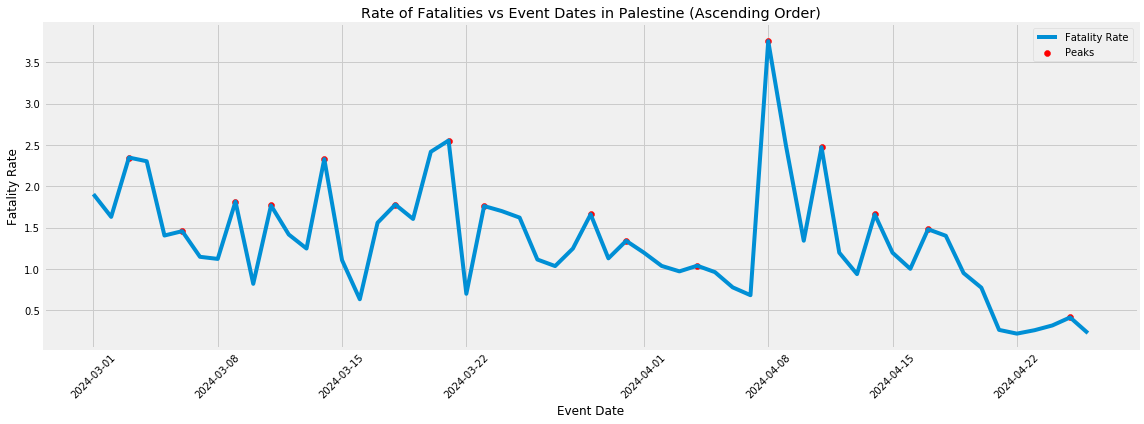

In [24]:
# Filter the data for Palestine
palestine_data_fatalities = acled_file[acled_file['country'] == 'Palestine']

# Group the data by event date and calculate the total fatalities and total number of events for each day
grouped_data_p_f = palestine_data_fatalities.groupby('event_date').agg({'fatalities': 'sum', 'event_type': 'count'})
grouped_data_p_f = grouped_data_p_f.rename(columns={'event_type': 'total_events'})

# Calculate the rate of fatalities by dividing total fatalities by total events for each day
grouped_data_p_f['fatality_rate'] = grouped_data_p_f['fatalities'] / grouped_data_p_f['total_events']

# Sort the data by event date in ascending order
grouped_data_p_f = grouped_data_p_f.sort_index()

# Identify peaks in the fatality rate data
peaks_p_f, _ = find_peaks(grouped_data_p_f['fatality_rate'], height=0.1)  # Adjust height threshold as needed

# Plot the fatality rate versus event dates
plt.figure(figsize=(16, 6))
plt.plot(grouped_data_p_f.index, grouped_data_p_f['fatality_rate'], label='Fatality Rate')
plt.scatter(grouped_data_p_f.index[peaks_p_f], grouped_data_p_f['fatality_rate'][peaks_p_f], color='red', marker='o', label='Peaks')
plt.title('Rate of Fatalities vs Event Dates in Palestine (Ascending Order)')
plt.xlabel('Event Date')
plt.ylabel('Fatality Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Annotate peak points
#for peak_index_p_f in peaks_p_f:
 #   plt.annotate('Peak', xy=(grouped_data_p_f.index[peak_index_p_f], grouped_data_p_f['fatality_rate'][peak_index_p_f]),
  #               xytext=(grouped_data_p_f.index[peak_index_p_f] + pd.DateOffset(days=3), grouped_data_p_f['fatality_rate'][peak_index] + 0.05),
   #              arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.tight_layout()
plt.show()

### Distributions of Fatalities Versus Civilian Targeting
* What's the distinction between these two data columns?
ACLED 'fatalities'column translates into the number of people who have died as a result of a violent event. Fatalities can include both combatants (such as armed group members or military personnel) and civilians.

In contrast, 'civilian_targeting' columns refers to the intentional or deliberate targeting of civilians during a violent event. Civilian targeting incidents specifically focus on acts of violence directed at non-combatant individuals or groups, with the intention of causing harm or instilling fear among civilian populations. This can include attacks on civilian infrastructure, such as schools, hospitals, or residential areas, as well as direct attacks on civilians themselves.
Consequently, fatalities represent the total number of deaths resulting from a violent event, regardless of whether the victims are combatants or civilians. On the other hand, civilian targeting specifically captures incidents where civilians are the primary focus or victims of violence.

In [26]:
# Filter the data for Palestine
palestine_subset = acled_file[acled_file['country'] == 'Palestine']
palestine_subset

event_id_cnty event_date  year  time_precision       disorder_type  \
56         PSE50836 2024-04-26  2024               1  Political violence   
57         PSE50838 2024-04-26  2024               1  Political violence   
58         PSE50844 2024-04-26  2024               1  Political violence   
59         PSE50853 2024-04-26  2024               1  Political violence   
60         PSE50865 2024-04-26  2024               1      Demonstrations   
...             ...        ...   ...             ...                 ...   
11581      PSE48084 2024-03-01  2024               1  Political violence   
11582      PSE48085 2024-03-01  2024               1  Political violence   
11678      PSE48054 2024-03-01  2024               1  Political violence   
11694      PSE48204 2024-03-01  2024               1  Political violence   
11728      PSE47930 2024-03-01  2024               1  Political violence   

                       event_type                     sub_event_type  \
56     Explosions/Remote violence                   Air/drone strike   
57     Explosions/Remote violence                   Air/drone strike   
58     Explosions/Remote violence                   Air/drone strike   
59     Explosions/Remote violence                   Air/drone strike   
60                          Riots              Violent demonstration   
...                           ...                                ...   
11581  Explosions/Remote violence                   Air/drone strike   
11582  Explosions/Remote violence  Shelling/artillery/missile attack   
11678  Explosions/Remote violence                   Air/drone strike   
11694                     Battles                        Armed clash   
11728                     Battles                        Armed clash   

                                  actor1            assoc_actor_1  inter1  \
56     Military Forces of Israel (2022-)                      NaN       8   
57     Military Forces of Israel (2022-)                      NaN       8   
58     Military Forces of Israel (2022-)                      NaN       8   
59     Military Forces of Israel (2022-)                      NaN       8   
60                   Rioters (Palestine)                      NaN       5   
...                                  ...                      ...     ...   
11581  Military Forces of Israel (2022-)                      NaN       8   
11582  Military Forces of Israel (2022-)                      NaN       8   
11678  Military Forces of Israel (2022-)                      NaN       8   
11694                     Hamas Movement                      NaN       3   
11728                       Katibat Jaba  Al Aqsa Martyrs Brigade       3   

       ... longitude geo_precision  \
56     ...   34.3925             2   
57     ...   34.3925             2   
58     ...   34.3660             1   
59     ...   34.2961             2   
60     ...   35.1447             2   
...    ...       ...           ...   
11581  ...   34.2482             1   
11582  ...   34.2482             2   
11678  ...   34.2824             1   
11694  ...   34.3228             1   
11728  ...   35.2213             1   

                                                  source  \
56                            Quds News Network; Twitter   
57     Ma'an News Agency; Newpress; Palestine News an...   
58     Palestine News and Information Agency; Quds Ne...   
59     Ma'an News Agency; Palestine News and Informat...   
60                   PLO Negotiations Affairs Department   
...                                                  ...   
11581  Ma'an News Agency; Palestine News and Informat...   
11582                PLO Negotiations Affairs Department   
11678  Newpress; Palestinian Ministry of Health; Quds...   
11694  Arab 48; Haaretz; Newpress; Quds News Network;...   
11728                Long War Journal; Quds News Network   

                 source_scale  \
56         New media-National   
57         New media-National   
58         New media-Natio

#### Days of Week Analysis

In [27]:
#2) Convert "palestine_subset" days of the week to datetime for data analysis
palestine_subset['event_date'] = pd.to_datetime(palestine_subset['event_date'])
palestine_subset['event_date'] 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


56      2024-04-26
57      2024-04-26
58      2024-04-26
59      2024-04-26
60      2024-04-26
           ...    
11581   2024-03-01
11582   2024-03-01
11678   2024-03-01
11694   2024-03-01
11728   2024-03-01
Name: event_date, Length: 3073, dtype: datetime64[ns]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


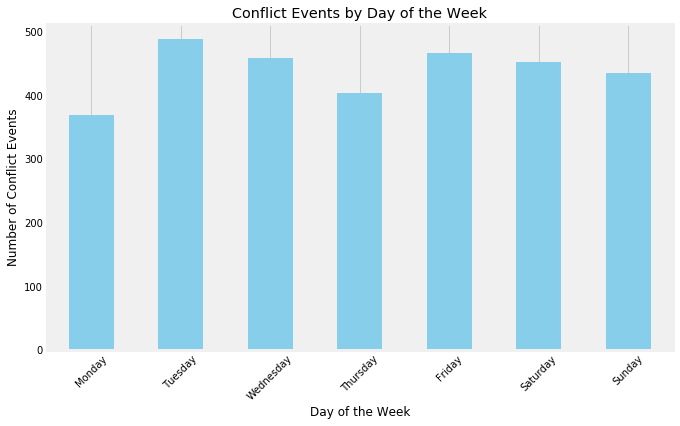

In [28]:
# Extract day of the week
palestine_subset['day_of_week'] = palestine_subset['event_date'].dt.day_name()

# Aggregate data by day of the week
conflicts_by_day = palestine_subset.groupby('day_of_week').size()

# Reorder days of the week for visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
conflicts_by_day = conflicts_by_day.reindex(days_order)

# Visualize conflict data by day of the week
plt.figure(figsize=(10, 6))
conflicts_by_day.plot(kind='bar', color='skyblue')
plt.title('Conflict Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Conflict Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Fatalities by Day of Week

In [29]:
#Values for civilian_targeting
palestine_subset['civilian_targeting'].value_counts()

Civilian targeting    1021
Name: civilian_targeting, dtype: int64

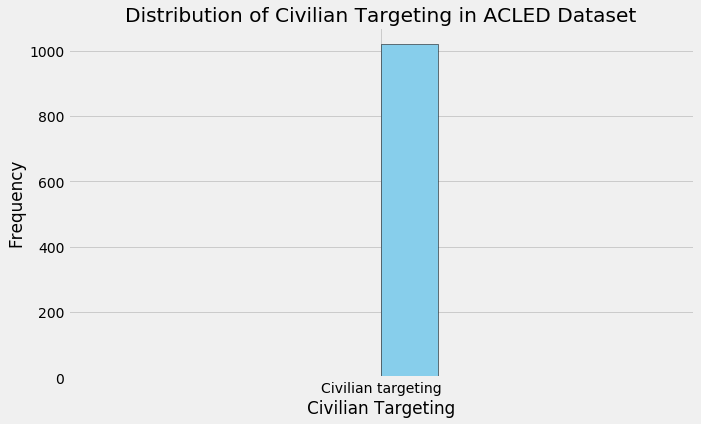

In [188]:
# Plot a histogram of civilian_targeting
plt.figure(figsize=(10, 6))
plt.hist(palestine_subset['civilian_targeting'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Civilian Targeting in ACLED Dataset')
plt.xlabel('Civilian Targeting')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

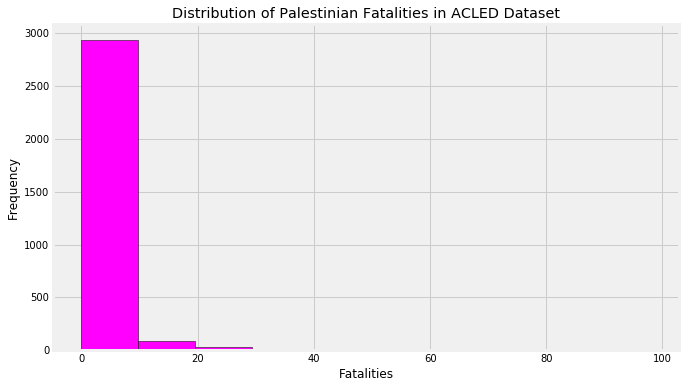

In [30]:
# Plot a histogram of fatalities
plt.figure(figsize=(10, 6))
plt.hist(palestine_subset['fatalities'].dropna(), bins=10, color='magenta', edgecolor='black')
plt.title('Distribution of Palestinian Fatalities in ACLED Dataset')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

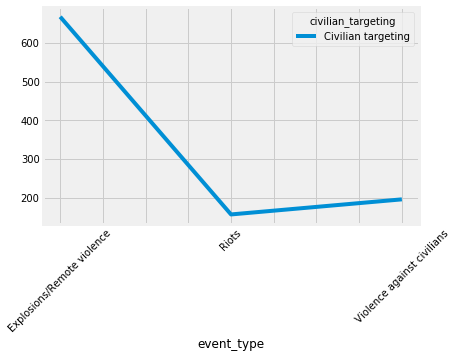

In [31]:
# plot two columns using Seaborn with count of violent events
# multiple groupby (pulse and diet both)
pal_violent_event_civilians = palestine_subset.groupby(['event_type', 'civilian_targeting']).count()['fatalities']
 
# plot the result for Palestinian violent_events with deaths including civilians
pal_violent_event_civilians.unstack().plot()
plt.xticks(rotation=45)
plt.show()

### The least number of civilian_targeting events occured during riots whereas Explosion/Remote violence resulted in over 600 targeted civilian deaths and civilian infrastructure. 

In [32]:
#Redo table of fatalities across days of week by actor, actor1
table_fatalities = pd.pivot_table(palestine_subset, values='fatalities', index=['actor1', 'assoc_actor_1'],
                       columns=['day_of_week'], aggfunc="sum")
table_fatalities

day_of_week                                                                              Friday  \
actor1                               assoc_actor_1                                                
Al Aqsa Martyrs Brigade              Hamas Movement                                         NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; P...     NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; Q...     NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; Q...     NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; R...     NaN   
...                                                                                         ...   
Unidentified Armed Group (Israel)    Settlers (Israel)                                      NaN   
Unidentified Armed Group (Palestine) Military Forces of Palestine (1994-)                   NaN   
                                     Refugees/IDPs (Palestine)                              NaN   
                                     Refugees/IDPs (Palestine); Rioters (Palestine)         NaN   
                                     Rioters (Palestine)                                    NaN   

day_of_week                                                                              Monday  \
actor1                               assoc_actor_1                                                
Al Aqsa Martyrs Brigade              Hamas Movement                                         NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; P...     NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; Q...     NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; Q...     NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; R...     NaN   
...                                                                                         ...   
Unidentified Armed Group (Israel)    Settlers (Israel)                                      NaN   
Unidentified Armed Group (Palestine) Military Forces of Palestine (1994-)                   NaN   
                                     Refugees/IDPs (Palestine)                              0.0   
                                     Refugees/IDPs (Palestine); Rioters (Palestine)         1.0   
                                     Rioters (Palestine)                                    0.0   

day_of_week                                                                              Saturday  \
actor1                               assoc_actor_1                                                  
Al Aqsa Martyrs Brigade              Hamas Movement                                           NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; P...       NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; Q...       NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; Q...       NaN   
                                     Hamas Movement; Hornet's Nest; Katibat Jenin; R...       NaN   
...                                                                                           ...   
Unidentified Armed Group (Israel)    Settlers (Israel)                                        NaN   
Unidentified Armed Group (Palestine) Military Forces of Palestine (1994-)                     NaN   
                                     Refugees/IDPs (Palestine)                                0.0   
                                     Refugees/IDPs (Palestine); Rioters (Palestine)           NaN   
                                     Rioters (Palestine)                                      0.0   

day_of_week                                                                              Sunday  \
actor1     

In [244]:
#Counts of Actor
table_actor_violence = palestine_subset.groupby('actor1')['assoc_actor_1'].value_counts('fatalities')
table_actor_violence

actor1                                assoc_actor_1                                                                                                                             
Al Aqsa Martyrs Brigade               Refugees/IDPs (Palestine); Rioters (Palestine)                                                                                                0.241379
                                      Rioters (Palestine)                                                                                                                           0.241379
                                      PIJ: Palestinian Islamic Jihad                                                                                                                0.103448
                                      Hamas Movement                                                                                                                                0.034483
                                      Hamas Movement; Hornet's Nest

In [246]:
table_fatalities_actor = pd.pivot_table(palestine_subset, values='fatalities', index=['actor1'],
                       columns=['day_of_week'], aggfunc="sum", margins=True)
table_fatalities_actor

day_of_week                                         Friday  Monday  Saturday  \
actor1                                                                         
Al Aqsa Martyrs Brigade                                1.0     0.0       2.0   
Al Nasser Salah al Deen Brigades                       NaN     NaN       NaN   
Balata Youth of Revenge and Liberation                 0.0     0.0       0.0   
Black Panther Brigades                                 0.0     NaN       NaN   
DFLP: Democratic Front for the Liberation of Pa...     NaN     NaN       NaN   
Hamas Movement                                        22.0    89.0      26.0   
Hornet's Nest                                          NaN     NaN       NaN   
Jenin Panthers Phalanges                               0.0     NaN       0.0   
Katibat Al Amari                                       0.0     NaN       NaN   
Katibat Bayt Ummar                                     NaN     NaN       NaN   
Katibat Bayt Ummar - Quick Response                    0.0     NaN       NaN   
Katibat Jaba                                           0.0     NaN       NaN   
Katibat Jenin                                          1.0     NaN       0.0   
Katibat Jericho                                        NaN     NaN       NaN   
Katibat Kafr Dan                                       0.0     NaN       NaN   
Katibat Nablus                                         0.0     NaN       0.0   
Katibat Nur ash Shams                                  0.0     NaN       NaN   
Katibat Qaffin                                         0.0     NaN       NaN   
Katibat Tubas                                          NaN     NaN       NaN   
Katibat Tulkarm                                        0.0     0.0       4.0   
Katibat Tulkarm - Quick Response                       2.0     NaN       0.0   
Lions of Glory                                         0.0     NaN       0.0   
Lions' Den                                             NaN     NaN       0.0   
Military Forces of Israel (2022-)                    486.0   527.0     483.0   
Military Forces of Israel (2022-) Special Forces       2.0     NaN       NaN   
Mujahideen Brigades                                    0.0     0.0       0.0   
PFLP: Popular Front for the Liberation of Pales...     NaN     NaN       NaN   
PIJ: Palestinian Islamic Jihad                         0.0     0.0       0.0   
Pioneers of Liberation - Nablus                        NaN     NaN       NaN   
Police Forces of Israel (2022-)                        0.0     0.0       NaN   
Police Forces of Israel (2022-) Border Police          NaN     NaN       NaN   
Police Forces of Palestine (1994-) West Bank           NaN     NaN       1.0   
Private Security Forces (Israel)                       0.0     NaN       0.0   
Private Security Forces (Palestine)                    0.0     NaN       NaN   
Protesters (Israel)                                    NaN     NaN       NaN   
Protesters (Palestine)                                 0.0     0.0       0.0   
Qabatiya Engineering Unit                              0.0     NaN       NaN   
Rioters (Israel)                                       0.0     0.0       0.0   
Rioters (Palestine)                                    2.0     1.0       0.0   
Settlers (Israel)                                      0.0     2.0       2.0   
Storm Brigade                                          NaN     NaN       NaN   
Tubas Engineering Unit - Jund Allah                    NaN     NaN       NaN   
Tulkarm Youth of Revenge and Liberation                0.0     0.0       0.0   
Unidentified Armed Group (Israel)                      NaN     NaN       NaN   
Unidentified Armed Group (Palestine)                   0.0     2.0      20.0   
All                                                  516.0   621.0     538.0   

day_of_week                                         Sunday  Thursday  Tuesday  \
actor1                                                                        

In [247]:
table_fatalities_actor_assoc = pd.pivot_table(palestine_subset, values='fatalities', index=['assoc_actor_1'],
                       columns=['day_of_week'], aggfunc="sum", margins=True)
table_fatalities_actor_assoc

day_of_week                                         Friday  Monday  Saturday  \
assoc_actor_1                                                                  
Al Aqsa Martyrs Brigade                                0.0     NaN       0.0   
Al Aqsa Martyrs Brigade - Nidal Al-Amoude              NaN     NaN       NaN   
Al Aqsa Martyrs Brigade - Nidal Al-Amoude; Muja...     NaN     NaN       0.0   
Al Aqsa Martyrs Brigade; Hamas Movement                NaN     NaN       NaN   
Al Aqsa Martyrs Brigade; Hamas Movement; Refuge...     NaN     NaN       NaN   
...                                                    ...     ...       ...   
Students (Palestine)                                   NaN     0.0       NaN   
Tulkarm Youth of Revenge and Liberation                0.0     NaN       0.0   
Unidentified Armed Group (Palestine)                   NaN     NaN       0.0   
Women (Palestine)                                      NaN     NaN       NaN   
All                                                   13.0    86.0      24.0   

day_of_week                                         Sunday  Thursday  Tuesday  \
assoc_actor_1                                                                   
Al Aqsa Martyrs Brigade                               15.0       0.0      NaN   
Al Aqsa Martyrs Brigade - Nidal Al-Amoude              NaN       NaN      NaN   
Al Aqsa Martyrs Brigade - Nidal Al-Amoude; Muja...    10.0       NaN      NaN   
Al Aqsa Martyrs Brigade; Hamas Movement                NaN       NaN      NaN   
Al Aqsa Martyrs Brigade; Hamas Movement; Refuge...     NaN      14.0      NaN   
...                                                    ...       ...      ...   
Students (Palestine)                                   NaN       NaN      0.0   
Tulkarm Youth of Revenge and Liberation                NaN       NaN      NaN   
Unidentified Armed Group (Palestine)                   NaN       NaN      3.0   
Women (Palestine)                                      NaN       0.0      NaN   
All                                                   35.0      70.0     22.0   

day_of_week                                         Wednesday  All  
assoc_actor_1                                                       
Al Aqsa Martyrs Brigade                                   0.0   15  
Al Aqsa Martyrs Brigade - Nidal Al-Amoude                 0.0    0  
Al Aqsa Martyrs Brigade - Nidal Al-Amoude; Muja...        NaN   10  
Al Aqsa Martyrs Brigade; Hamas Movement                   0.0    0  
Al Aqsa Martyrs Brigade; Hamas Movement; Refuge...        0.0   14  
...                                                       ...  ...  
Students (Palestine)                                      0.0    0  
Tulkarm Youth of Revenge and Liberation                   NaN    0  
Unidentified Armed Group (Palestine)                      NaN    3  
Women (Palestine)                                         NaN    0  
All                                                      48.0  298  

[74 rows x 8 columns]

In [235]:
# cross tab of Days of Week and Fatalities
pd.crosstab(index=palestine_subset['fatalities'], columns=palestine_subset['day_of_week'], margins=True)

day_of_week  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
fatalities                                                                    
0               379     293       372     367       331      398        362   
1                24      16        18      12        18       22         26   
2                 8      10        12       8         7       20         11   
3                12       5        11       5        11       14         13   
4                 1       4         6       5         2        4          8   
5                11       3         3       3         3        1          7   
6                 6       5         4       3         2        2          6   
7                 1      10         4       2         2        3          3   
8                 5       3         2       3         2        1          5   
9                 6       3         1       1         1        0          4   
10                5       2         2       5         0        3          2   
11                2       0         2       2         4        2          2   
12                2       1         3       2         4        3          1   
13                0       2         1       1         2        4          1   
14                1       2         0       1         1        1          0   
15                0       0         1       5         1        1          0   
17                0       0         0       0         0        1          0   
18                0       0         1       3         0        1          0   
19                0       1         2       1         0        1          0   
20                0       1         2       0         1        1          1   
21                0       1         1       2         1        1          1   
22                0       0         0       3         1        0          1   
23                1       0         0       1         0        1          0   
24                0       0         0       0         1        0          1   
25                0       0         1       0         2        1          0   
27                0       0         1       0         2        0          2   
28                0       0         0       0         1        0          0   
29                1       0         0       0         0        0          0   
30                0       1         0       0         0        1          0   
31                0       0         1       0         0        0          0   
33                0       0         0       0         1        0          0   
34                0       4         0       0         0        0          0   
35                0       1         0       0         0        0          0   
36                1       0         0       0         1        0          0   
40                0       0         0       0         0        0          1   
41                0       1         1       0         0        0          0   
46                1       0         0       0         0        0          0   
50                0       0         0       0         1        0          0   
56                0       0         0       0         0        0          1   
98                0       0         0       0         0        1          0   
All             467     369       452     435       403      488        459   

day_of_week   All  
fatalities         
0            2502  
1             136  
2              76  
3              71  
4              30  
5              31  
6              28  
7              25  
8              21  
9              16  
10             19  
11             14  
12             16  
13             11  
14              6  
15              8  
17              1  
18              5  
19              5  
20              6  
21              7  
22              5  
23              3  
24              2  
25              4  
27              5  
28              1  
29              1  
30

In [227]:
# cross tab of Actors and Fatalities palestine_subset['fatalities'], columns=palestine_subset['day_of_wee
pd.crosstab(index=palestine_subset['fatalities'], columns=palestine_subset['actor1'])

actor1      Al Aqsa Martyrs Brigade  Al Nasser Salah al Deen Brigades  \
fatalities                                                              
0                                67                                 1   
1                                 1                                 0   
2                                 1                                 0   
3                                 1                                 0   
4                                 0                                 0   
5                                 0                                 0   
6                                 0                                 0   
7                                 0                                 0   
8                                 0                                 0   
9                                 0                                 0   
10                                0                                 0   
11                                0                                 0   
12                                0                                 0   
13                                0                                 0   
14                                0                                 0   
15                                0                                 0   
17                                0                                 0   
18                                0                                 0   
19                                0                                 0   
20                                0                                 0   
21                                0                                 0   
22                                0                                 0   
23                                0                                 0   
24                                0                                 0   
25                                0                                 0   
27                                0                                 0   
28                                0                                 0   
29                                0                                 0   
30                                0                                 0   
31                                0                                 0   
33                                0                                 0   
34                                0                                 0   
35                                0                                 0   
36                                0                                 0   
40                                0                                 0   
41                                0                                 0   
46                                0                                 0   
50                                0                                 0   
56                                0                                 0   
98                                0                                 0   

actor1      Balata Youth of Revenge and Liberation  Black Panther Brigades  \
fatalities                                                                   
0                                                8                       2   
1                                                0                       0   
2                                                0                       0   
3                                                0                       0   
4                                                0                       0   
5                                                0                       0   
6                                                0                       0   
7                                                0                       0   
8                                                0                       0   
9                                                0                       0 

In [236]:
palestine_subset.event_date

56      2024-04-26
57      2024-04-26
58      2024-04-26
59      2024-04-26
60      2024-04-26
           ...    
11581   2024-03-01
11582   2024-03-01
11678   2024-03-01
11694   2024-03-01
11728   2024-03-01
Name: event_date, Length: 3073, dtype: datetime64[ns]

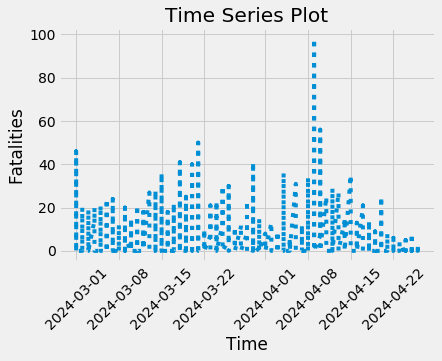

In [239]:
# Create the plot
plt.plot(palestine_subset['event_date'], palestine_subset['fatalities'], linestyle = 'dotted')

#Size
#plt.figure(figsize=(16, 6))
# Add title and axis labels
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)

# Display the plot
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


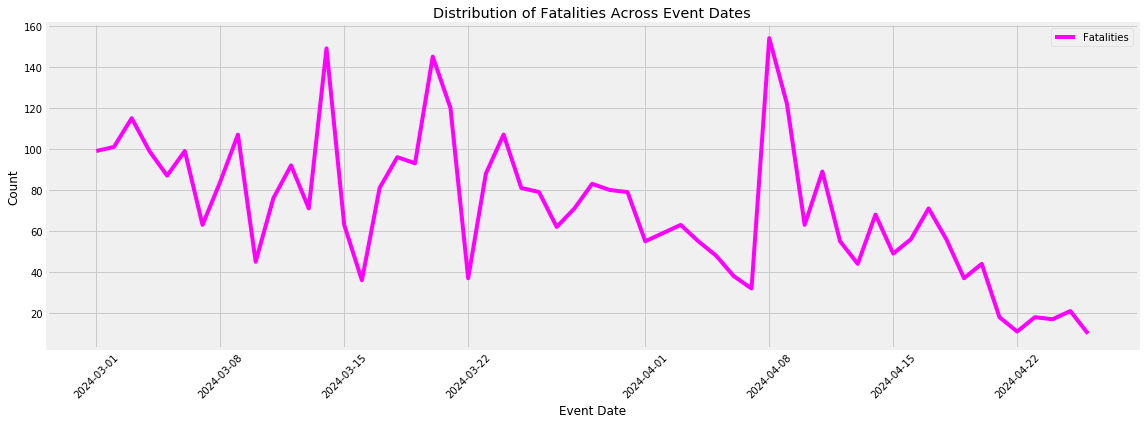

In [34]:
# Group the data by event_date and sum the fatalities
grouped_fatalities = palestine_subset.groupby('event_date')['fatalities'].sum().reset_index()

# Plot the distribution of fatalities across event_dates
plt.figure(figsize=(16, 6))

# Plot fatalities
plt.plot(grouped_fatalities['event_date'], grouped_fatalities['fatalities'], label='Fatalities', color='magenta')

plt.title('Distribution of Fatalities Across Event Dates')
plt.xlabel('Event Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1296x576 with 0 Axes>

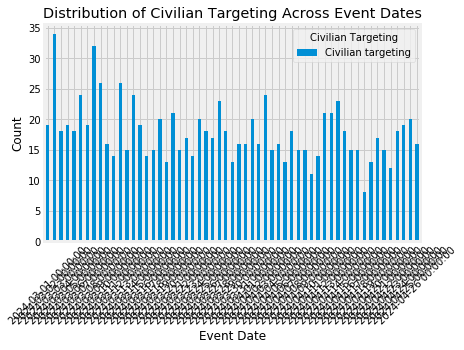

In [35]:
# Group the data by event_date and civilian_targeting, and count the occurrences
grouped_civilian_targeting = palestine_subset.groupby(['event_date', 'civilian_targeting']).size().unstack(fill_value=0)

# Plot the distribution of civilian_targeting across event_dates
plt.figure(figsize=(18, 8))

# Plot civilian targeting
grouped_civilian_targeting.plot(kind='bar', stacked=True)

plt.title('Distribution of Civilian Targeting Across Event Dates')
plt.xlabel('Event Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Civilian Targeting')
#plt.tight_layout()
# Expand x-axis
plt.xlim(grouped_civilian_targeting.index[-1], grouped_civilian_targeting.index[1])
plt.show()

## Visual of Palestine Versus All MENA Except Israel 

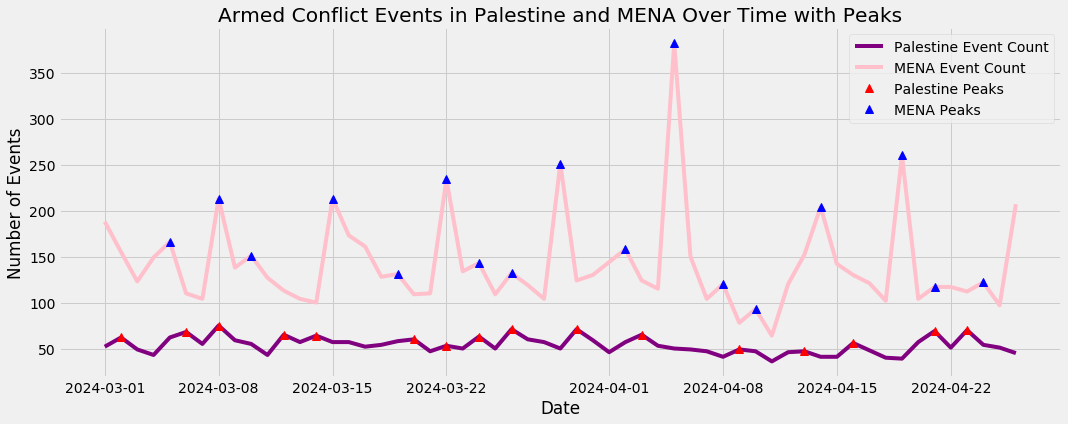

In [95]:
# Visualize the data for Palestine and MENA in the same plot with peaks
plt.figure(figsize=(16, 6))

#Plot Palestine Line as Purple
plt.plot(aggregated_palestine_data.index, aggregated_palestine_data.values, label='Palestine Event Count', color='purple')

#Plot MENA Without Israel as light pink using filtered_data to aggregate
# Aggregate the data (e.g., by date) for MENA
aggregated_mena_data = filtered_data.groupby(['event_date']).size()

# Identify peaks for MENA
peaks_mena, _ = find_peaks(aggregated_mena_data, height=10)  # Adjust the height threshold as needed

plt.plot(aggregated_mena_data.index, aggregated_mena_data.values, label='MENA Event Count', color='pink')
plt.plot(aggregated_palestine_data.index[peaks_palestine], aggregated_palestine_data.values[peaks_palestine], 'r^', markersize=8, label='Palestine Peaks')

plt.plot(aggregated_mena_data.index[peaks_mena], aggregated_mena_data.values[peaks_mena], 'b^', markersize=8, label='MENA Peaks')
plt.title('Armed Conflict Events in Palestine and MENA Over Time with Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

### count of 'disorder_type': Were there any demonstrations in Palestine?

In [248]:
#Organize a Table of Disorder in Palestine
palestine_subset['disorder_type'].value_counts()

Political violence        2812
Strategic developments     181
Demonstrations              80
Name: disorder_type, dtype: int64

In [217]:
#Organize a Table that includes fatalities 
palestine_subset.groupby('disorder_type')['sub_event_type'].value_counts() 

disorder_type           sub_event_type                   
Demonstrations          Peaceful protest                      73
                        Violent demonstration                  5
                        Protest with intervention              2
Political violence      Air/drone strike                     928
                        Shelling/artillery/missile attack    786
                        Mob violence                         500
                        Armed clash                          348
                        Attack                               194
                        Grenade                               33
                        Remote explosive/landmine/IED         21
                        Abduction/forced disappearance         2
Strategic developments  Looting/property destruction         123
                        Other                                 37
                        Arrests                                8
                        Disrupte

In [218]:
#Organize a Table that includes fatalities 

# Create a pivot table
pivot_table_fatalities = pd.pivot_table(palestine_subset, values='fatalities', index=['disorder_type', 'sub_event_type'], aggfunc='sum')

print(pivot_table_fatalities)

                                                          fatalities
disorder_type          sub_event_type                               
Demonstrations         Peaceful protest                            0
                       Protest with intervention                   0
                       Violent demonstration                       0
Political violence     Abduction/forced disappearance              0
                       Air/drone strike                         3150
                       Armed clash                               449
                       Attack                                    157
                       Grenade                                     0
                       Mob violence                                7
                       Remote explosive/landmine/IED               1
                       Shelling/artillery/missile attack         276
Strategic developments Arrests                                     0
                       Change to g

### Observation: 
The highest number of fatalities occured under 'Air/drone strike' with  3150 fatalities followed by 'Armed clash' resulting in 449 fatalities. The theirs is 'Shelling/artillery/missile attack' with         276 fatalities. These are all categorized as 'Political violence' and no arrests in Gaza were made in this time period as well as not recorded demonstrations. How can civilians demonstrate when they're being targeted?

## Phase 3:
### Precision of Event Description
* A numeric code between 1 and 3 indicating the level of precision of the date recorded for the event.  The higher the number, the lower the precision.

In [37]:
#Organize a Table that includes fatalities 

 
# multiple groupby (pulse, diet and time)
#df = data.groupby(['pulse', 'diet', 'time']).count()['kind']
#print(df)

# Create a pivot table
civ_infr_fatal = palestine_subset.groupby(['event_type','sub_event_type','time_precision']).count()['civilian_targeting']

civ_infr_fatal

event_type                  sub_event_type                     time_precision
Battles                     Armed clash                        1                   0
                                                               2                   0
Explosions/Remote violence  Air/drone strike                   1                 551
                            Grenade                            1                   2
                            Remote explosive/landmine/IED      1                   1
                                                               2                   0
                            Shelling/artillery/missile attack  1                 114
Protests                    Peaceful protest                   1                   0
                            Protest with intervention          1                   0
Riots                       Mob violence                       1                 157
                            Violent demonstration              1        

### Actor Type Grouped by Fatalities Analysis: One Group result statistically significantly different?

In [80]:
# Group data by 'actor1' and select 'fatalities'
actor_groups = [group['fatalities'] for name, group in palestine_subset.groupby('actor1')]

In [81]:
# import f_onewya to Perform ANOVA
from scipy.stats import f_oneway

#Run ANOVA
f_statistic, p_value = f_oneway(*actor_groups)

print('ANOVA F-Statistic:', f_statistic)
print('ANOVA p-value:', p_value)

ANOVA F-Statistic: 2.510226230001944
ANOVA p-value: 1.8168660382319997e-07


### Day of Week comparison

In [82]:
#Day of Week comparison
# Group data by 'actor1' and select 'fatalities'
day_groups = [group['fatalities'] for name, group in palestine_subset.groupby('day_of_week')]

In [83]:
#Run ANOVA
f_statistic, p_value = f_oneway(*day_groups)

print('ANOVA F-Statistic:', f_statistic)
print('ANOVA p-value:', p_value)

ANOVA F-Statistic: 0.7686544531247961
ANOVA p-value: 0.5945190053009317


### Event Type Comparison
* Apply The Kruskal-Wallis H-test because this will test the null hypothesis that the population median of all of the event_type groupings are equal. 
* It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. 
* Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

In [85]:
#import Kruskal
from scipy.stats import f_oneway, kruskal

In [86]:
# ANOVA to compare fatalities across event types
event_types = palestine_subset['event_type'].unique()
anova_results = []

for event_type in event_types:
    group = palestine_subset[palestine_subset['event_type'] == event_type]['fatalities']
    anova_results.append(group)

f_statistic, p_value = f_oneway(*anova_results)
print('ANOVA F-Statistic for Event Types:', f_statistic)
print('ANOVA p-value for Event Types:', p_value)

# Kruskal-Wallis test to compare fatalities among different actors
actors = palestine_subset['actor1'].unique()
kruskal_results = []

for actor in actors:
    group = palestine_subset[palestine_subset['actor1'] == actor]['fatalities']
    kruskal_results.append(group)

h_statistic, p_value = kruskal(*kruskal_results)
print('Kruskal-Wallis H-Statistic for Actors:', h_statistic)
print('Kruskal-Wallis p-value for Actors:', p_value)

ANOVA F-Statistic for Event Types: 18.529919130335973
ANOVA p-value for Event Types: 3.543981446688251e-18
Kruskal-Wallis H-Statistic for Actors: 264.3190854299915
Kruskal-Wallis p-value for Actors: 3.258326264401381e-33


In [ ]:
### Not statistically significant between actor groupings. Accept the Null. 

## Random Forest Classifier of Fatalities Based on Day of Week, Event Type, Actor

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [46]:
#Features
col_names = ['event_type','sub_event_type','disorder_type','fatalities','day_of_week','time_precision','actor1',
            'assoc_actor_1']


for col in col_names:
    

    print(palestine_subset[col].value_counts())   

Explosions/Remote violence    1768
Riots                          505
Battles                        348
Violence against civilians     196
Strategic developments         181
Protests                        75
Name: event_type, dtype: int64
Air/drone strike                     928
Shelling/artillery/missile attack    786
Mob violence                         500
Armed clash                          348
Attack                               194
Looting/property destruction         123
Peaceful protest                      73
Other                                 37
Grenade                               33
Remote explosive/landmine/IED         21
Arrests                                8
Disrupted weapons use                  8
Violent demonstration                  5
Change to group/activity               5
Protest with intervention              2
Abduction/forced disappearance         2
Name: sub_event_type, dtype: int64
Political violence        2812
Strategic developments     181
Demons

In [73]:
# Select relevant features
features = ['event_type', 'sub_event_type', 'disorder_type', 'fatalities', 'time_precision', 'actor1',
            'civilian_targeting','geo_precision']

X = palestine_subset[features]
y = palestine_subset['day_of_week']

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2151, 32), (922, 32))

###  Categorical Variables
* Include both the target and feature variables that are categorical

In [68]:
# Define preprocessing steps for categorical features
categorical_features = ['event_type', 'sub_event_type', 'disorder_type', 'actor1','day_of_week','civilian_targeting']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])


In [69]:
# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [70]:
# Fit the model
model.fit(X_train, y_train)

# Predict day_of_week on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


ValueError: A given column is not a column of the dataframe

### How is violence against civilian most in Syria than in Palestine in Ramadan unlies "Explosins/Revmote Violent" event type? 

## Day of Week for second Notebook

In [6]:
#Day of Week
## Friday is 4
acled_file['day_of_week'] = acled_file['event_date'].dt.dayofweek
acled_file

event_id_cnty event_date  year  time_precision       disorder_type  \
0         SYR127072 2024-04-26  2024               1  Political violence   
1          YEM87085 2024-04-26  2024               1  Political violence   
2          YEM87121 2024-04-26  2024               1      Demonstrations   
3          YEM87203 2024-04-26  2024               1      Demonstrations   
4          BHR12724 2024-04-26  2024               1      Demonstrations   
...             ...        ...   ...             ...                 ...   
11756      YEM85896 2024-03-01  2024               1      Demonstrations   
11757      YEM85901 2024-03-01  2024               1      Demonstrations   
11758      IRQ52386 2024-03-01  2024               1  Political violence   
11759      IRQ52435 2024-03-01  2024               1  Political violence   
11760      YEM85890 2024-03-01  2024               1      Demonstrations   

                       event_type                     sub_event_type  \
0      Explosions/Remote violence  Shelling/artillery/missile attack   
1      Explosions/Remote violence  Shelling/artillery/missile attack   
2                        Protests                   Peaceful protest   
3                        Protests                   Peaceful protest   
4                        Protests                   Peaceful protest   
...                           ...                                ...   
11756                    Protests                   Peaceful protest   
11757                    Protests                   Peaceful protest   
11758  Explosions/Remote violence                   Air/drone strike   
11759  Explosions/Remote violence                   Air/drone strike   
11760                    Protests                   Peaceful protest   

                                        actor1  \
0             Military Forces of Syria (2000-)   
1      Military Forces of Yemen (2017-) Houthi   
2                           Protesters (Yemen)   
3                           Protesters (Yemen)   
4                         Protesters (Bahrain)   
...                                        ...   
11756                       Protesters (Yemen)   
11757                       Protesters (Yemen)   
11758        Military Forces of Turkey (2016-)   
11759        Military Forces of Turkey (2016-)   
11760                       Protesters (Yemen)   

                                           assoc_actor_1  inter1  ...  \
0                                                    NaN       1  ...   
1                                                    NaN       1  ...   
2                     Government of Yemen (2017-) Houthi       6  ...   
3                     Government of Yemen (2017-) Houthi       6  ...   
4                            February 14 Youth Coalition       6  ...   
...                                                  ...     ...  ...   
11756                 Government of Yemen (2017-) Houthi       6  ...   
11757  Government of Yemen (2017-) Houthi; Military F...       6  ...   
11758                                                NaN       8  ...   
11759                                                NaN       8  ...   
11760                 Government of Yemen (2017-) Houthi       6  ...   

      longitude geo_precision  \
0       36.2602             1   
1       41.4067             3   
2       43.5942             1   
3       43.5175             2   
4       50.5362             1   
...         ...           ...   
11756   43.1978             2   
11757   43.5448             2   
11758   43.5172             2   
11759   43.5175             2   
11760   43.2881             2   

                                                  source  \
0                                            SHAAM; SOHR   
1      Ansar Allah; The Washington Institute; UKMTO; ...   
2      Yemen Data Project; Yemen News Agency (SABA) -...   
3      Yemen Data Project; Yemen News Agency (SABA) -...   
4      14 February Revolution Youth Coalition; Bahrai

In [7]:
#Groupby counts of  'day_of_week'
acled_file['day_of_week'].value_counts()

4    2621
5    1737
6    1657
1    1593
0    1470
2    1414
3    1269
Name: day_of_week, dtype: int64

<Figure size 576x432 with 0 Axes>

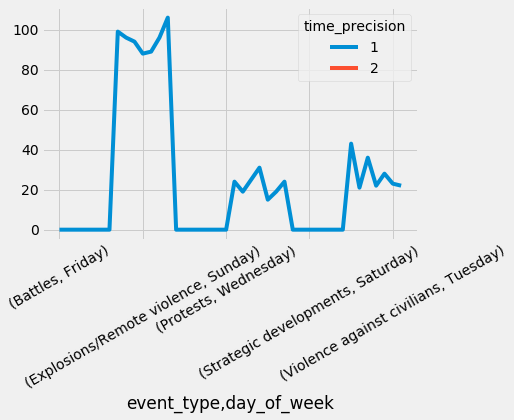

In [290]:
#Show Precision of violent events per day of week


dow_event_precision = palestine_subset.groupby(['event_type','day_of_week','time_precision']).count()['civilian_targeting']
dow_event_precision

# plot the result
plt.figure(figsize=(8, 6))
dow_event_precision.unstack().plot()
plt.xticks(rotation=30)
plt.show()

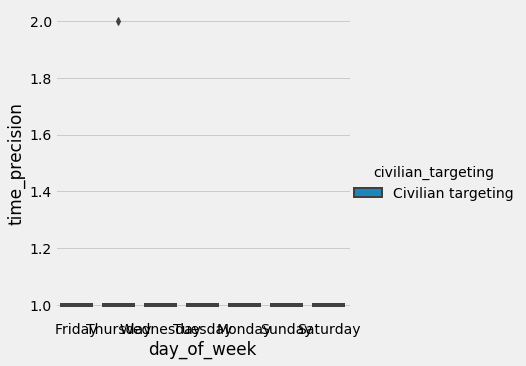

In [319]:
#Try Again too many points, rec'd to use Stripplot
# filter on mostly event type with highest casualties

#palestine_subset['precise'] = palestine_subset['civilian_targeting'].isin(['1','2'])
sns.catplot(data=palestine_subset, y='time_precision', x="day_of_week", hue="civilian_targeting", kind="box")

In [332]:
#Need day of week for subset
#Groupby counts of  'day_of_week'
#palestine_subset['day_of_week'] = palestine_subset['event_date'].dt.dayofweek
#palestine_subset.groupby(['event_type','sub_event_type','time_precision']).count()['civilian_targeting']
palestine_subset.groupby(['disorder_type','time_precision','fatalities']).count()['civilian_targeting']

disorder_type           time_precision  fatalities
Demonstrations          1               0               0
Political violence      1               0             549
                                        1             102
                                        2              68
                                        3              53
                                        4              24
                                        5              28
                                        6              26
                                        7              24
                                        8              20
                                        9              15
                                        10             14
                                        11             13
                                        12             14
                                        13             11
                                        14              5
                     

In [ ]:
palestine_subset['day_of_week'].value_counts()

In [38]:
#Table of "Day of Week" by Actor
# cross tab of Cut and Color
pd.crosstab(index=palestine_subset['day_of_week'], columns=palestine_subset['time_precision'])

time_precision    1  2
day_of_week           
Friday          467  0
Monday          369  0
Saturday        452  0
Sunday          435  0
Thursday        401  2
Tuesday         488  0
Wednesday       458  1

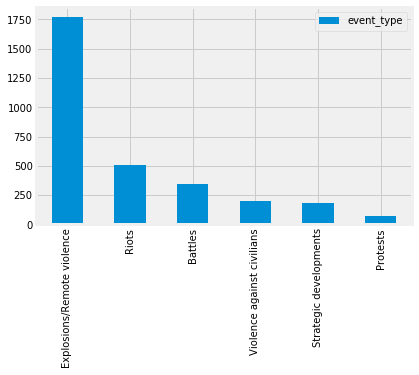

In [47]:
#explore the event type count variation 
pd.DataFrame(palestine_subset['event_type'].value_counts()).plot(kind='bar')

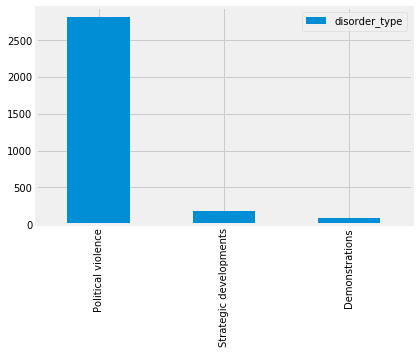

In [48]:
#explore the event type count variation 
pd.DataFrame(palestine_subset['disorder_type'].value_counts()).plot(kind='bar')

In [51]:
palestine_subset['civilian_targeting']

56       Civilian targeting
57       Civilian targeting
58       Civilian targeting
59       Civilian targeting
60                      NaN
                ...        
11581    Civilian targeting
11582                   NaN
11678    Civilian targeting
11694                   NaN
11728                   NaN
Name: civilian_targeting, Length: 3073, dtype: object

### Filter Palestine for Civilian Target
* Appy ANOVA to compare counts by day of week


H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population (days of week counts) are equal)
H1 (null hypothesis): It states that there will be at least one population mean: violent events on day of week that differs from the rest of the days of the week

In [42]:
#Civilian Targeting
targeted_yes = palestine_subset[palestine_subset['civilian_targeting'] == 'Civilian targeting']['fatalities']
targeted_no = palestine_subset[palestine_subset['civilian_targeting'] == 'NaN']['fatalities']

print(targeted_yes.head())

56    0
57    2
58    1
59    3
61    1
Name: fatalities, dtype: int64


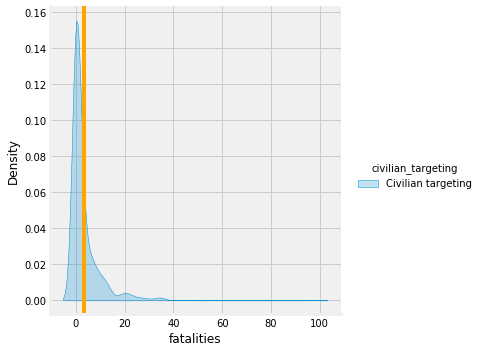

Did target civilian	3.27
Did not target civilian	nan


In [43]:
#Distribution plot of civilian_targeting
sns.displot(palestine_subset, x="fatalities", hue="civilian_targeting", kind='kde', fill=True)
plt.axvline(x=targeted_yes.mean(), color='orange')
plt.axvline(x=targeted_no.mean(), color='blue')
plt.show()

print(f'Did target civilian\t{round(targeted_yes.mean(), 2)}')
print(f'Did not target civilian\t{round(targeted_no.mean(), 2)}')

In [44]:
##T-test
from scipy import stats

stats.ttest_ind(targeted_yes, targeted_no)

Ttest_indResult(statistic=nan, pvalue=nan)

In [46]:
#explore the event type count variation 
palestine_subset.groupby('day_of_week')['event_type'].value_counts()

day_of_week  event_type                
Friday       Explosions/Remote violence    257
             Riots                          89
             Battles                        55
             Violence against civilians     43
             Strategic developments         15
             Protests                        8
Monday       Explosions/Remote violence    224
             Riots                          59
             Battles                        29
             Strategic developments         28
             Violence against civilians     21
             Protests                        8
Saturday     Explosions/Remote violence    269
             Riots                          71
             Battles                        40
             Violence against civilians     36
             Strategic developments         28
             Protests                        8
Sunday       Explosions/Remote violence    234
             Riots                          87
             Battles

### Observation: most attacks occur on a Friday, followed by Saturday, then Sunday. Thursdays see the least violence.  Check if IoF by grouping by threat actor.

## Descriptives 

In [48]:
#what do the values look like?
acled_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56810 entries, 0 to 56809
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       56810 non-null  object 
 1   event_date          56810 non-null  object 
 2   year                56810 non-null  int64  
 3   time_precision      56810 non-null  int64  
 4   disorder_type       56810 non-null  object 
 5   event_type          56810 non-null  object 
 6   sub_event_type      56810 non-null  object 
 7   actor1              56810 non-null  object 
 8   assoc_actor_1       20059 non-null  object 
 9   inter1              56810 non-null  int64  
 10  interaction         56810 non-null  int64  
 11  civilian_targeting  10636 non-null  object 
 12  iso                 56810 non-null  int64  
 13  region              56810 non-null  object 
 14  country             56810 non-null  object 
 15  admin1              56711 non-null  object 
 16  admi

In [8]:
#population_best breaks down as what?
acled_file.population_best.value_counts()

66997.0    147
48434.0    100
31501.0     85
39728.0     81
69772.0     79
          ... 
48344.0      1
2122.0       1
16496.0      1
34357.0      1
1.0          1
Name: population_best, Length: 2395, dtype: int64

In [9]:
#Mean/mode
acled_file.describe()   #Max Number of fatalities in given event is 160 

year  time_precision        inter1        inter2   interaction  \
count  11761.0    11761.000000  11761.000000  11761.000000  11761.000000   
mean    2024.0        1.031120      5.602075      2.381600     50.304566   
std        0.0        0.178954      2.434372      3.065351     23.787543   
min     2024.0        1.000000      1.000000      0.000000     10.000000   
25%     2024.0        1.000000      3.000000      0.000000     28.000000   
50%     2024.0        1.000000      6.000000      0.000000     60.000000   
75%     2024.0        1.000000      8.000000      7.000000     78.000000   
max     2024.0        3.000000      8.000000      8.000000     88.000000   

                iso      latitude     longitude  geo_precision    fatalities  \
count  11761.000000  11761.000000  11761.000000   11761.000000  11761.000000   
mean     506.226936     31.795983     38.862648       1.471899      0.497492   
std      236.832652      6.466238      5.661195       0.542023      2.660785   
min       48.000000      9.856700     25.909000       1.000000      0.000000   
25%      275.000000     31.448600     35.101800       1.000000      0.000000   
50%      376.000000     33.086100     36.276700       1.000000      0.000000   
75%      760.000000     35.837300     43.487700       2.000000      0.000000   
max      887.000000     42.026800     62.331000       3.000000     98.000000   

          timestamp  population_best   day_of_week  
count  1.176100e+04     10389.000000  11761.000000  
mean   1.712494e+09     17668.210607      3.174815  
std    1.404341e+06     29111.381666      1.959162  
min    1.709590e+09         0.000000      0.000000  
25%    1.711410e+09      1982.000000      1.000000  
50%    1.712617e+09      7107.000000      4.000000  
75%    1.713831e+09     22956.000000      5.000000  
max    1.714573e+09    541894.000000      6.000000

### Events Type Analysis


In [74]:
#Type of event across whole world
acled_file['event_type'].value_counts()

Explosions/Remote violence    5124
Protests                      3138
Battles                       1178
Strategic developments        1022
Riots                          653
Violence against civilians     646
Name: event_type, dtype: int64

In [75]:
# Filter for civilian targeting events
civilian_events_palestine = palestine_subset[palestine_subset['event_type'] == 'Violence against civilians']

# Group by region and count the number of events
region_counts = civilian_events_palestine.groupby('region').size().reset_index(name='counts')
region_counts

region  counts
0  Middle East     196

#### Fatalities Review

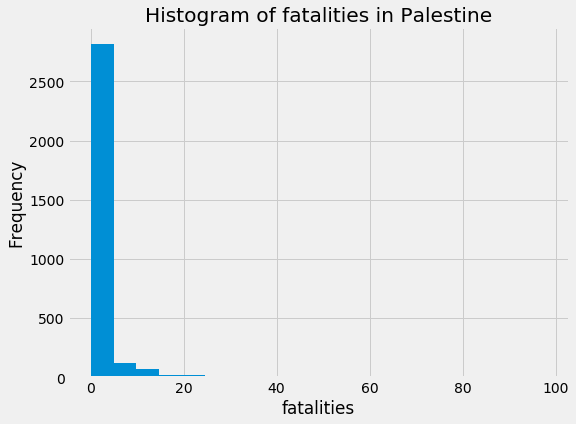

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


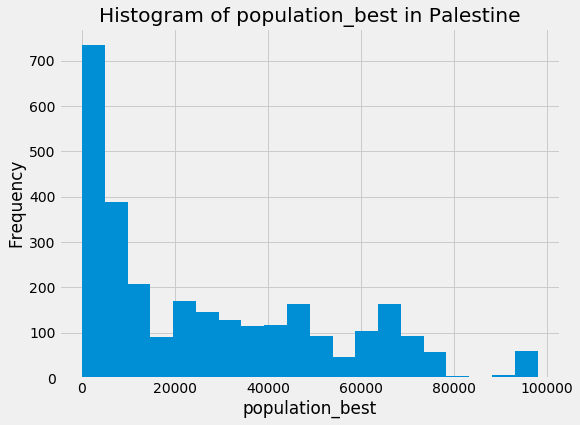

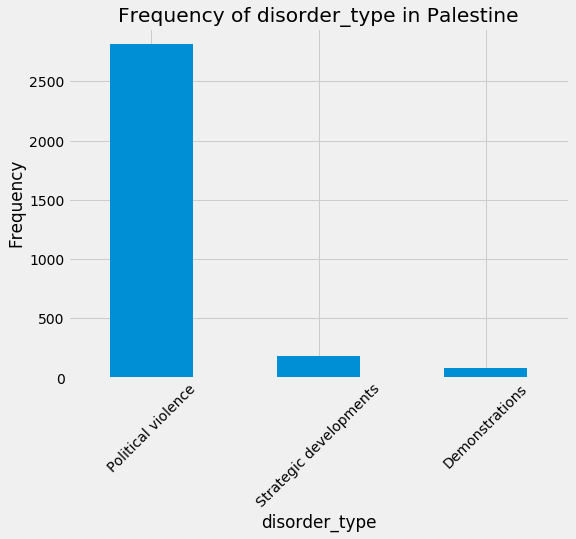

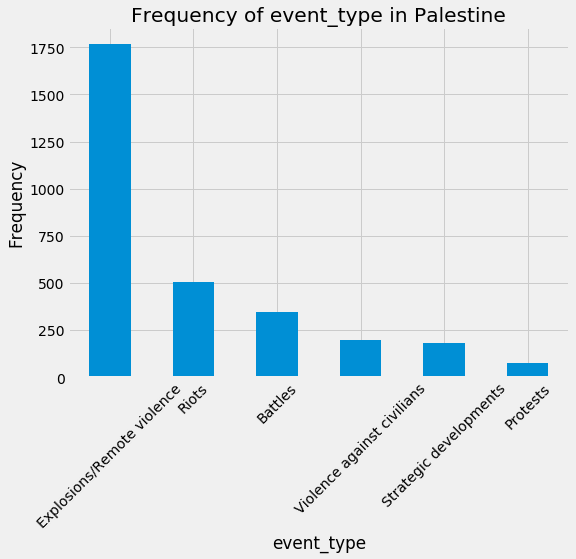

In [116]:
# Visualize numerical features
numerical_features = ['fatalities', 'population_best']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(palestine_data[feature], bins=20)
    plt.title(f'Histogram of {feature} in Palestine')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Visualize categorical features
categorical_features = ['disorder_type', 'event_type']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    palestine_data[feature].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {feature} in Palestine')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### Visualize relation of actors and 'interaction' on civilian targeting and fatalities

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


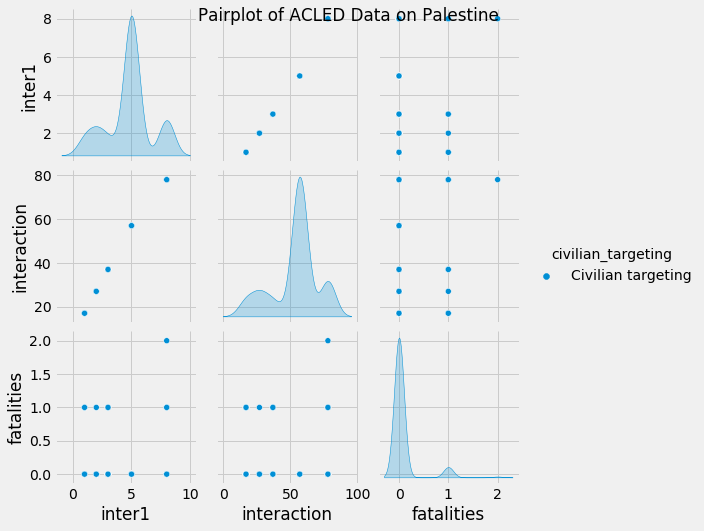

In [117]:
# Select  columns to review relation of actors and 'interaction' on civilian targeting and fatalities
pal_target_columns = ['actor1', 'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'fatalities']
pal_data_subset = acled_file[pal_target_columns]

# Check for missing values and handle them if necessary
pal_data_subset.dropna(inplace=True)

# Visualize the effects using pairplot
sns.pairplot(pal_data_subset, hue='civilian_targeting', diag_kind='kde')
plt.suptitle('Pairplot of ACLED Data on Palestine')
plt.show()

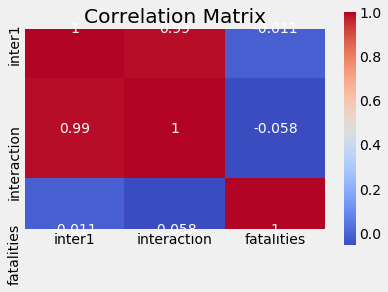

In [119]:
# Visualize the correlation between variables
correlation_matrix = pal_data_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
### Look at Actors

## Groupings

In [17]:
#Group by Disorder Type
acled_file.groupby('disorder_type')['event_type'].value_counts()

disorder_type                       event_type                
Demonstrations                      Protests                      3136
                                    Riots                           93
Political violence                  Explosions/Remote violence    5124
                                    Battles                       1178
                                    Violence against civilians     646
                                    Riots                          560
Political violence; Demonstrations  Protests                         2
Strategic developments              Strategic developments        1022
Name: event_type, dtype: int64

In [18]:
#sub_event_type	looks like grouped by 'disorder_type'
acled_file.groupby('disorder_type')['sub_event_type'].value_counts() 

disorder_type                       sub_event_type                    
Demonstrations                      Peaceful protest                      3071
                                    Violent demonstration                   93
                                    Protest with intervention               65
Political violence                  Air/drone strike                      2559
                                    Shelling/artillery/missile attack     2294
                                    Armed clash                           1177
                                    Mob violence                           560
                                    Attack                                 488
                                    Remote explosive/landmine/IED          215
                                    Abduction/forced disappearance         158
                                    Grenade                                 54
                                    Suicide bomb            

### Observation: Peaceful protests are occuring along with political violence. Find out which countries.

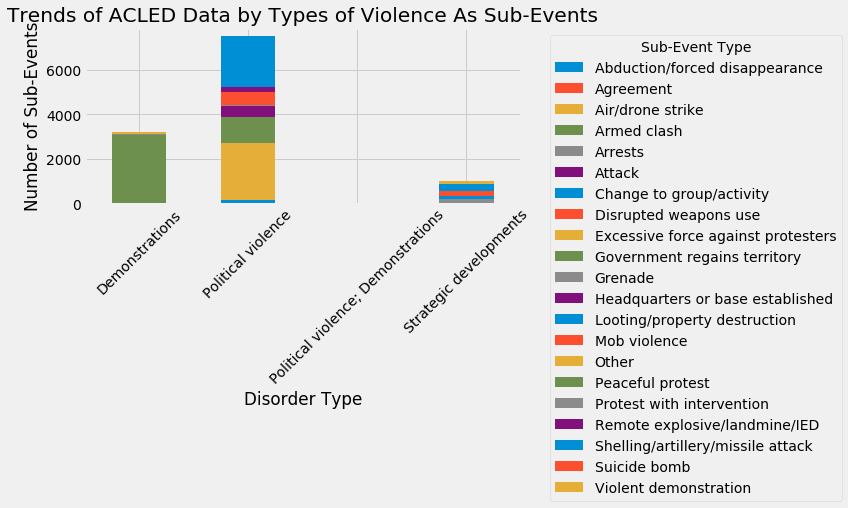

In [99]:
# Group the data by disorder type and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'sub_event_type']).size().unstack(fill_value=0)

# Visualize the trends using a stacked bar chart
violence_trends.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trends of ACLED Data by Types of Violence As Sub-Events')
plt.xlabel('Disorder Type')
plt.ylabel('Number of Sub-Events')
plt.legend(title='Sub-Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


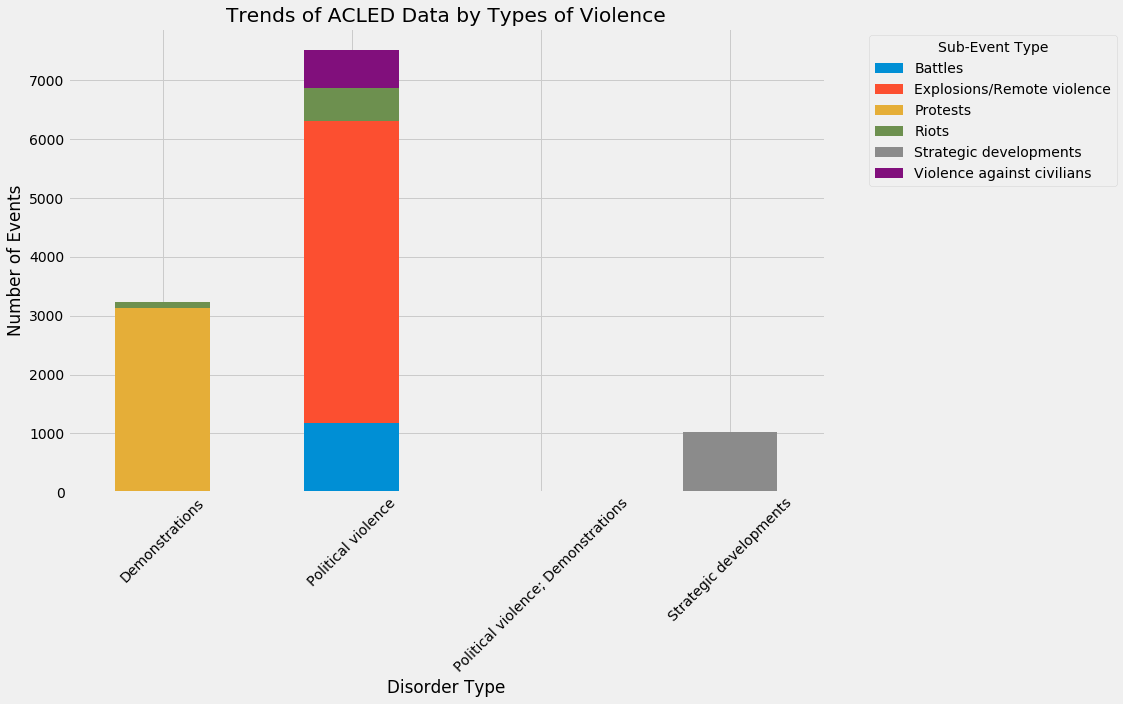

In [102]:
### Ramadan Aggregate level of Events

# Group the data by disorder type and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a stacked bar chart
violence_trends.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Trends of ACLED Data by Types of Violence')
plt.xlabel('Disorder Type')
plt.ylabel('Number of Events')
plt.legend(title='Sub-Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## By Country

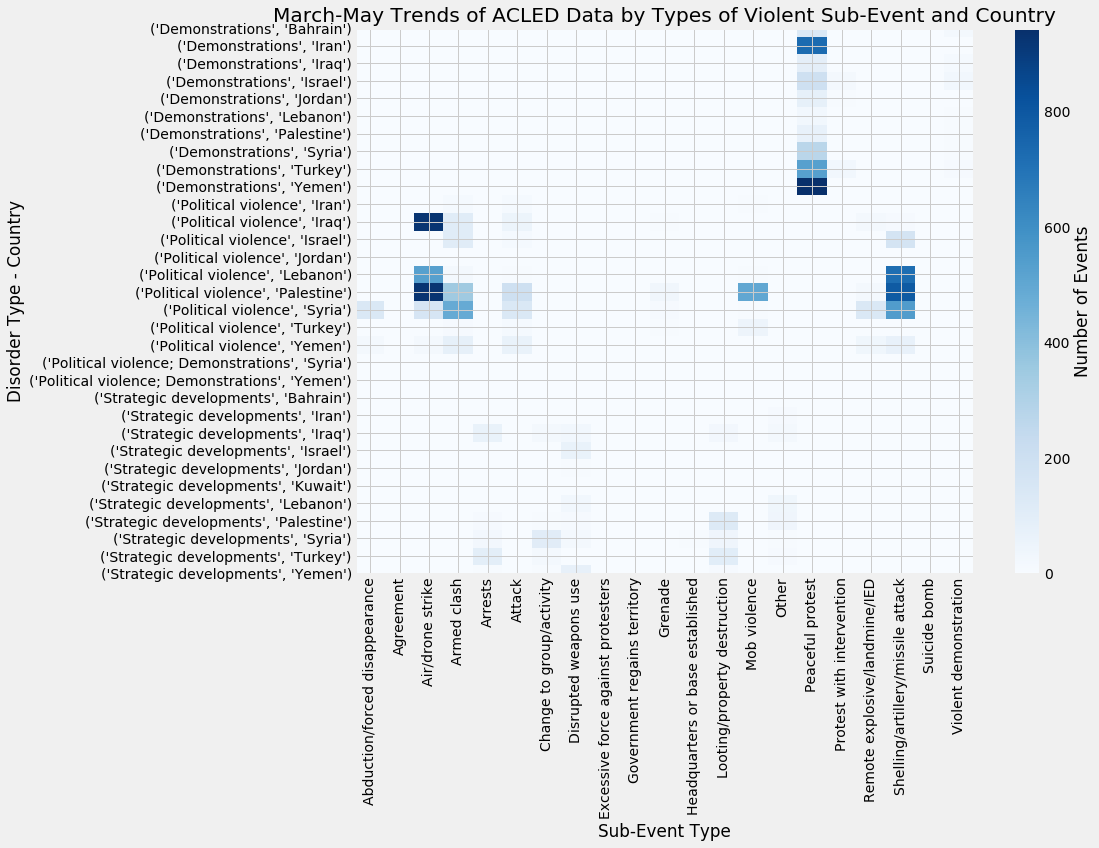

In [111]:
# Group the data by disorder type, region, and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'country', 'sub_event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(16, 12))
plt.imshow(violence_trends, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('March-May Trends of ACLED Data by Types of Violent Sub-Event and Country')
plt.xlabel('Sub-Event Type')
plt.ylabel('Disorder Type - Country')
plt.xticks(range(len(violence_trends.columns)), violence_trends.columns, rotation=90)
plt.yticks(range(len(violence_trends.index)), violence_trends.index)
plt.tight_layout()
plt.show()

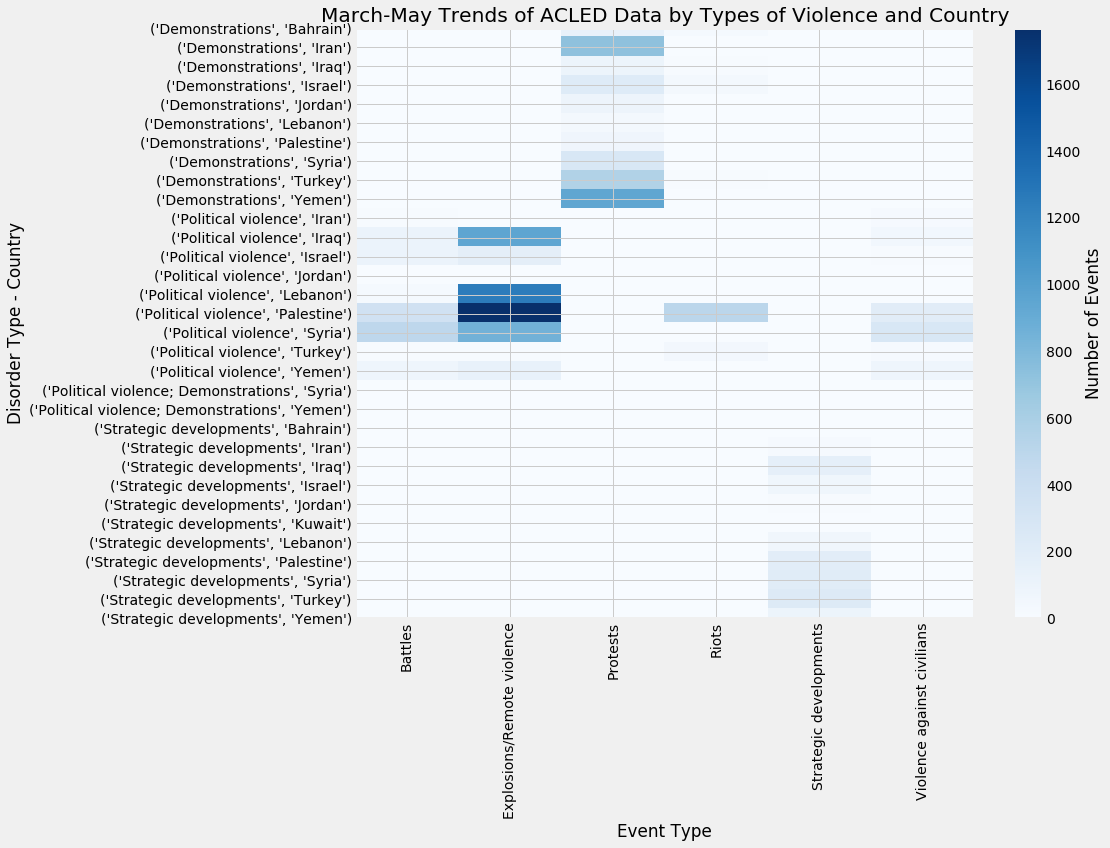

In [108]:
# Group the data by disorder type, region, and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'country', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(16, 12))
plt.imshow(violence_trends, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('March-May Trends of ACLED Data by Types of Violence and Country')
plt.xlabel('Event Type')
plt.ylabel('Disorder Type - Country')
plt.xticks(range(len(violence_trends.columns)), violence_trends.columns, rotation=90)
plt.yticks(range(len(violence_trends.index)), violence_trends.index)
plt.tight_layout()
plt.show()


## Heatmaps

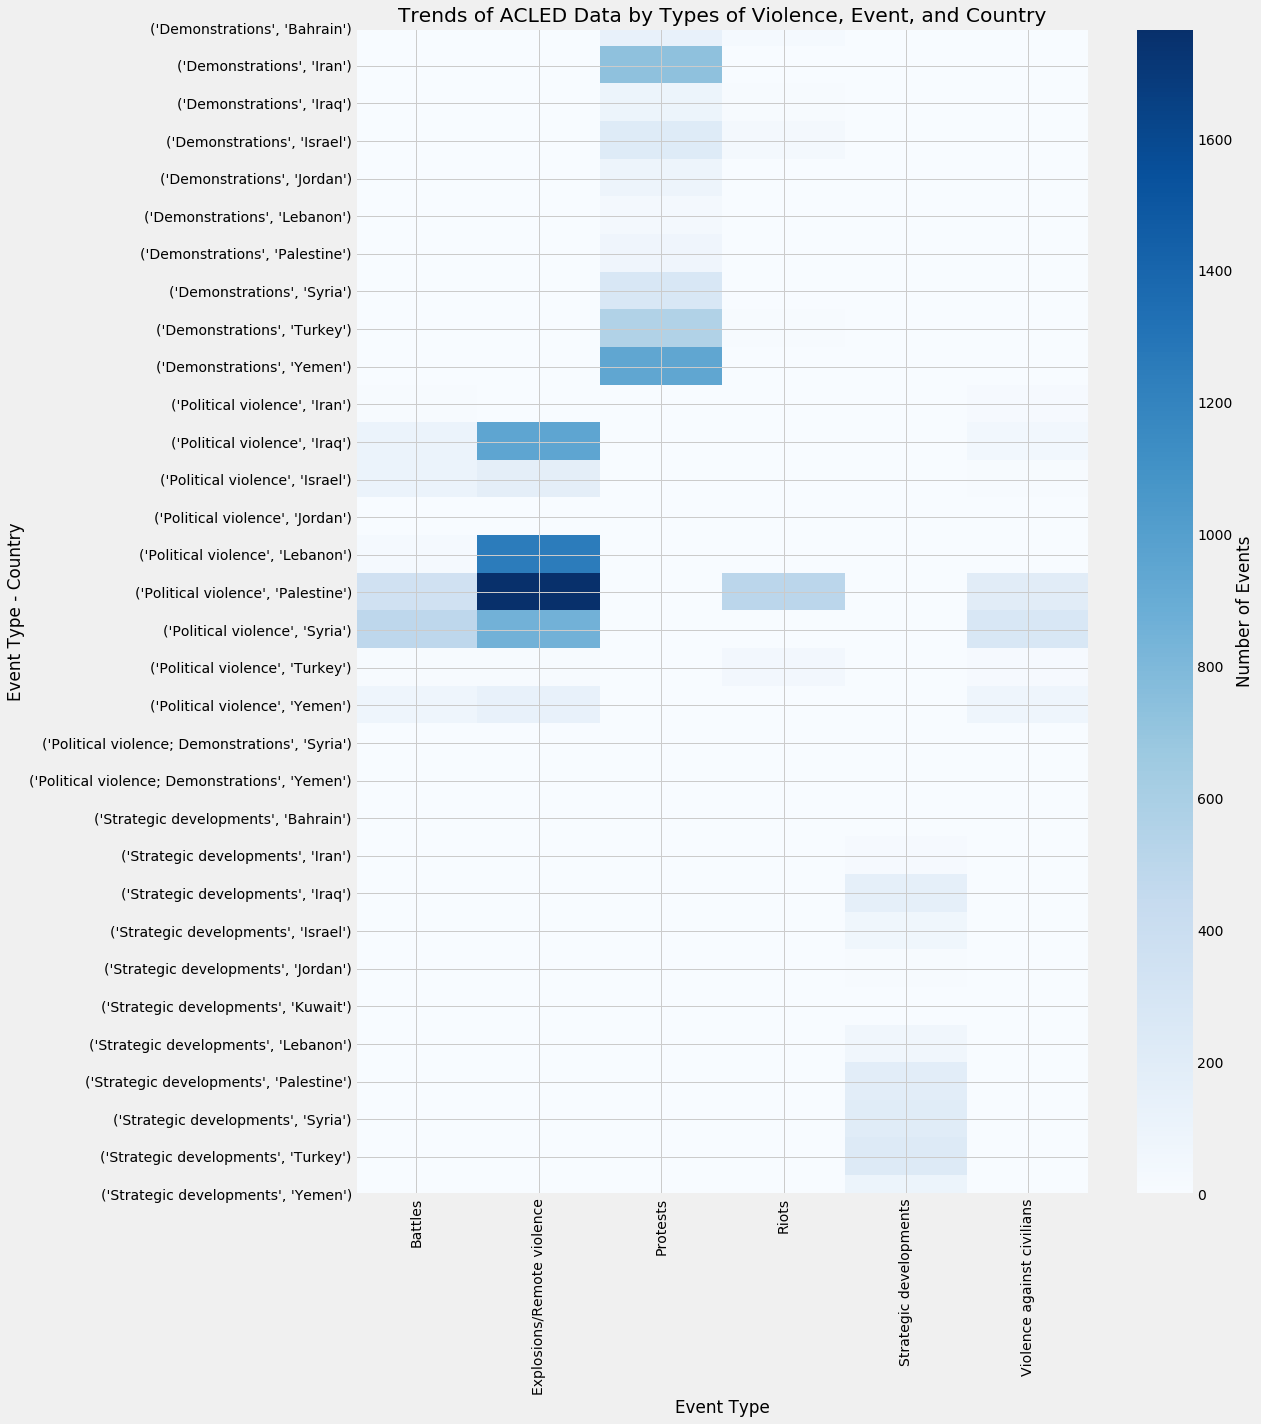

In [110]:
# Group the data by event type, region, and Event type and count occurrences
violence_trends_country_event = acled_file.groupby(['disorder_type', 'country', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(18, 20))
plt.imshow(violence_trends_country_event, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence, Event, and Country')
plt.xlabel('Event Type')
plt.ylabel('Event Type - Country')
plt.xticks(range(len(violence_trends_country_event.columns)), violence_trends_country_event.columns, rotation=90)
plt.yticks(range(len(violence_trends_country_event.index)), violence_trends_country_event.index)
plt.tight_layout()
plt.show()

## Filter on Palestine, Syria, Lebanon & Israel

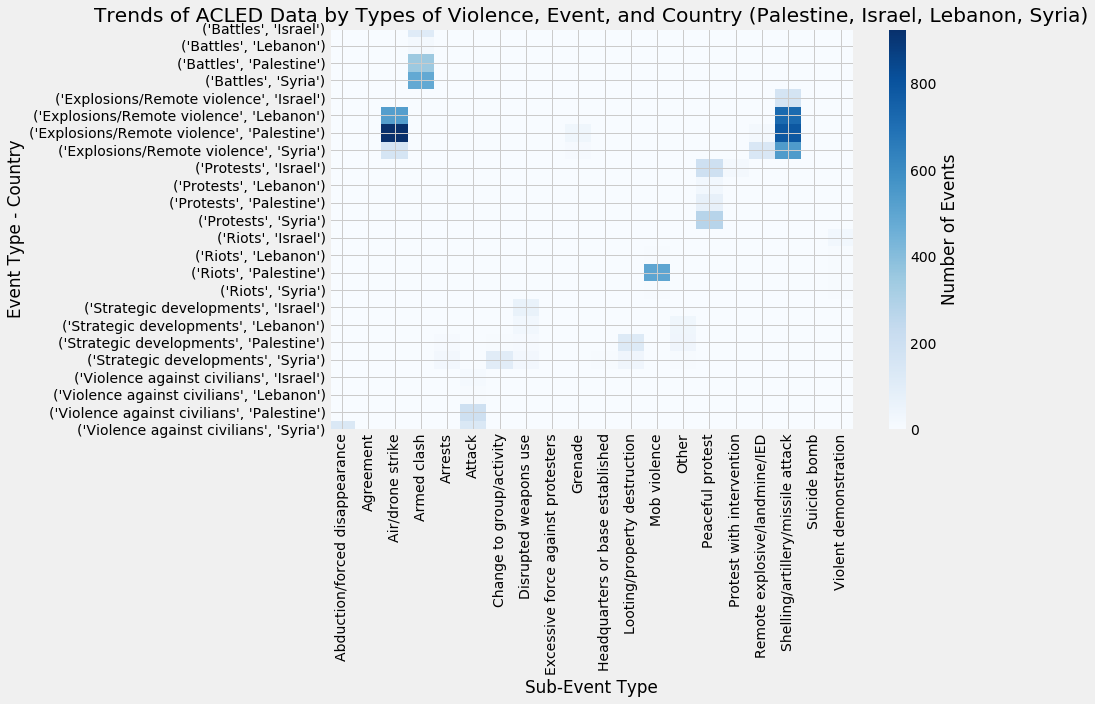

In [112]:
# Filter the data to include only events in Palestine, Israel, Lebanon, and Syria
selected_countries_pal_lb_syr = ['Palestine', 'Israel', 'Lebanon', 'Syria']
filtered_data_pal_lb_syr = acled_file[acled_file['country'].isin(selected_countries_pal_lb_syr)]

# Group the filtered data by event type, country, and sub-event type and count occurrences
violence_trends_pal_lb_syr = filtered_data_pal_lb_syr.groupby(['event_type', 'country', 'sub_event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(14, 10))
plt.imshow(violence_trends_pal_lb_syr, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence, Event, and Country (Palestine, Israel, Lebanon, Syria)')
plt.xlabel('Sub-Event Type')
plt.ylabel('Event Type - Country')
plt.xticks(range(len(violence_trends_pal_lb_syr.columns)), violence_trends_pal_lb_syr.columns, rotation=90)
plt.yticks(range(len(violence_trends_pal_lb_syr.index)), violence_trends_pal_lb_syr.index)
plt.tight_layout()
plt.show()

## Focus on Casualties
* Use violence_trends_pal_lb_syr

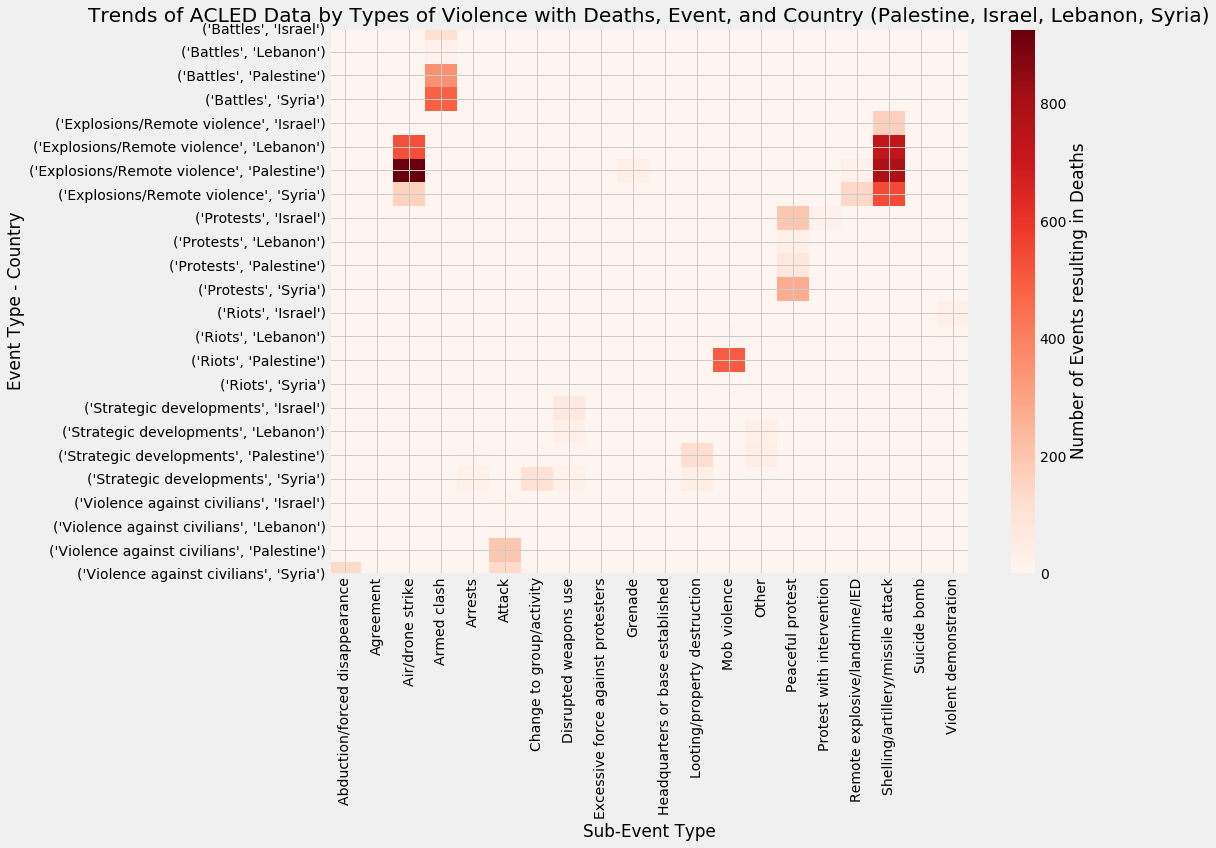

In [114]:
# Visualize the trends using a heatmap
plt.figure(figsize=(16, 12))
plt.imshow(violence_trends_pal_lb_syr, cmap='Reds', aspect='auto')
plt.colorbar(label='Number of Events resulting in Deaths')
plt.title('Trends of ACLED Data by Types of Violence with Deaths, Event, and Country (Palestine, Israel, Lebanon, Syria)')
plt.xlabel('Sub-Event Type')
plt.ylabel('Event Type - Country')
plt.xticks(range(len(violence_trends_pal_lb_syr.columns)), violence_trends_pal_lb_syr.columns, rotation=90)
plt.yticks(range(len(violence_trends_pal_lb_syr.index)), violence_trends_pal_lb_syr.index)
plt.tight_layout()
plt.show()

In [19]:
#Twitter came up as a source 
source_most_cited = acled_file.groupby("country")['source'].value_counts()
source_most_cited  #How many times was Twitter a primary source?

country  source                                                             
Bahrain  14 February Revolution Youth Coalition                                 36
         14 February Revolution Youth Coalition; Bahrain Alyoum                 35
         Bahrain Alyoum                                                         21
         ADHRB                                                                  10
         14 February Revolution Youth Coalition; Bahrain Alyoum; LuaLua TV       9
                                                                                ..
Yemen    Xinhua; Yemeni Army - Houthi                                            1
         Yemen Data Project; YNP                                                 1
         Yemen Data Project; Yemen Future; Yemen News Agency (SABA) - Houthi     1
         Yemen Data Project; Yemen Press Agency                                  1
         Yemen Window                                                            1
Name: sour

### How many times was Twitter a primary source?

In [20]:
#How many times was Twitter a primary source?
substr = 'Twitter'
print (acled_file.source.str.count(substr).sum())

1891


In [21]:
#Call apply on the 'scores' column on the groupby object and use the vectorise str method contains, use this to filter the group and call count: In : 
#df.groupby(['catA', 'catB'])['scores'].apply(lambda x: x[x.str.contains('RET')].count())

countries_Twitter_source = acled_file.groupby(['country', 'disorder_type'])['source'].apply(lambda x: x[x.str.contains("Twitter")].count())
countries_Twitter_source 

country    disorder_type                     
Bahrain    Demonstrations                           0
           Strategic developments                   0
Iran       Demonstrations                           0
           Political violence                       0
           Strategic developments                   0
Iraq       Demonstrations                           0
           Political violence                       0
           Strategic developments                   0
Israel     Demonstrations                           0
           Political violence                       1
           Strategic developments                   1
Jordan     Demonstrations                           0
           Political violence                       0
           Strategic developments                   0
Kuwait     Strategic developments                   0
Lebanon    Demonstrations                           0
           Political violence                     534
           Strategic developments   

In [41]:
countries_Twitter_type = acled_file.groupby(['country', 'source'])['disorder_type'].apply(lambda x: x[x.str.contains("Twitter")].count())
countries_Twitter_type 

country  source                                                                                         
Bahrain  14 February Revolution Youth Coalition                                                             0
         14 February Revolution Youth Coalition; ADHRB                                                      0
         14 February Revolution Youth Coalition; ADHRB; AhlulBayt News Agency; Bahrain Alyoum; LuaLua TV    0
         14 February Revolution Youth Coalition; ADHRB; Bahrain Alyoum                                      0
         14 February Revolution Youth Coalition; ADHRB; Bahrain Alyoum; Bahrain Mirror                      0
                                                                                                           ..
Yemen    Yemen Data Project; Yemen News Agency (SABA) - Houthi                                              0
         Yemen Data Project; Yemen News Agency (SABA) - Houthi; Yemeni Army - Houthi                        0
         Yemen 

In [48]:
#Sort for Twitter as source
countries_Twitter_type.sort_values(ascending=False)

country    source                                                          
Yemen      Yemen Window                                                        0
Israel     Makor Rishon; N12                                                   0
           Long War Journal                                                    0
           Long War Journal; Newpress                                          0
           Ma'ariv                                                             0
                                                                              ..
Palestine  Arab 48; Ma'an News Agency; Newpress; Quds News Network             0
           Arab 48; Ma'an News Agency; Newpress; Quds News Network; Twitter    0
           Arab 48; Ma'an News Agency; Newpress; Twitter                       0
           Arab 48; Ma'an News Agency; PLO Negotiations Affairs Department     0
Bahrain    14 February Revolution Youth Coalition                              0
Name: disorder_type, Length: 1660

In [24]:
# Understand the sub-area  of interest df[["country", "description","points"]].head()
acled_file[['country','actor1','source', 'source_scale','event_type']].head(20).sort_values(by='country')

country                                     actor1  \
4   Bahrain                       Protesters (Bahrain)   
5   Bahrain                       Protesters (Bahrain)   
6   Bahrain                       Protesters (Bahrain)   
7   Bahrain                       Protesters (Bahrain)   
8   Bahrain                       Protesters (Bahrain)   
9      Iran                          Protesters (Iran)   
10     Iran                          Protesters (Iran)   
11     Iran                          Protesters (Iran)   
17     Iraq                          Protesters (Iraq)   
16     Iraq  Military Forces of Iraq (2022-) Peshmerga   
15     Iraq            Unidentified Armed Group (Iraq)   
18     Iraq                          Protesters (Iraq)   
12     Iraq          Military Forces of Turkey (2016-)   
13     Iraq            Unidentified Armed Group (Iraq)   
14     Iraq              Police Forces of Iraq (2022-)   
19   Israel                        Protesters (Israel)   
0     Syria           Military Forces of Syria (2000-)   
2     Yemen                         Protesters (Yemen)   
1     Yemen    Military Forces of Yemen (2017-) Houthi   
3     Yemen                         Protesters (Yemen)   

                                               source            source_scale  \
4   14 February Revolution Youth Coalition; Bahrai...          Other-National   
5   14 February Revolution Youth Coalition; Bahrai...          Other-National   
6   14 February Revolution Youth Coalition; Bahrai...          Other-National   
7                                      Bahrain Alyoum                National   
8                                      Bahrain Alyoum                National   
9                                       Eteraze Bazar               New media   
10                     Baloch Campaign; Eteraze Bazar         Other-New media   
11                     Baloch Campaign; Eteraze Bazar         Other-New media   
17                                          Al Mirbad                National   
16                                           ANF News           International   
15  Al Mada; Al Maloomah; Al Mirbad; Al Sumaria TV...                National   
18                                          Al Mirbad                National   
12                                           ROJ News                Regional   
13  Al Mirbad; Baghdad Today; Basnews; GardaWorld;...       Other-Subnational   
14  Al Ghad Press; Al Mada; Al Maloomah; Baghdad T...                National   
19  Haaretz; Israel Hayom; Ma'ariv; N12; Srugim; T...                National   
0                                         SHAAM; SOHR          Other-National   
2   Yemen Data Project; Yemen News Agency (SABA) -...  Local partner-National   
1   Ansar Allah; The Washington Institute; UKMTO; ...  Local partner-National   
3   Yemen Data Project; Yemen News Agency (SABA) -...  Local partner-National   

                    event_type  
4                     Protests  
5                     Protests  
6                     Protests  
7                     Protests  
8                     Protests  
9                     Protests  
10                    Protests  
11                    Protests  
17                    Protests  
16      Strategic developments  
15  Violence against civilians  
18                    Protests  
12  Explosions/Remote violence  
13  Explosions/Remote violence  
14      Strategic developments  
19                    Protests  
0   Explosions/Remote violence  
2                     Protests  
1   Explosions/Remote violence  
3                     Protests

In [28]:
# Understand the subarea  of interest df[["country", "description","points"]].head()
acled_file[['country','actor1','source', 'event_type']].head(20).value_counts()

country  actor1                                     source                                                                                                                                event_type                
Yemen    Protesters (Yemen)                         Yemen Data Project; Yemen News Agency (SABA) - Houthi                                                                                 Protests                      2
Iraq     Protesters (Iraq)                          Al Mirbad                                                                                                                             Protests                      2
Iran     Protesters (Iran)                          Baloch Campaign; Eteraze Bazar                                                                                                        Protests                      2
Bahrain  Protesters (Bahrain)                       Bahrain Alyoum                                                                   

## Actor Analysis
** Subset the data for Palestine and Israel actors 

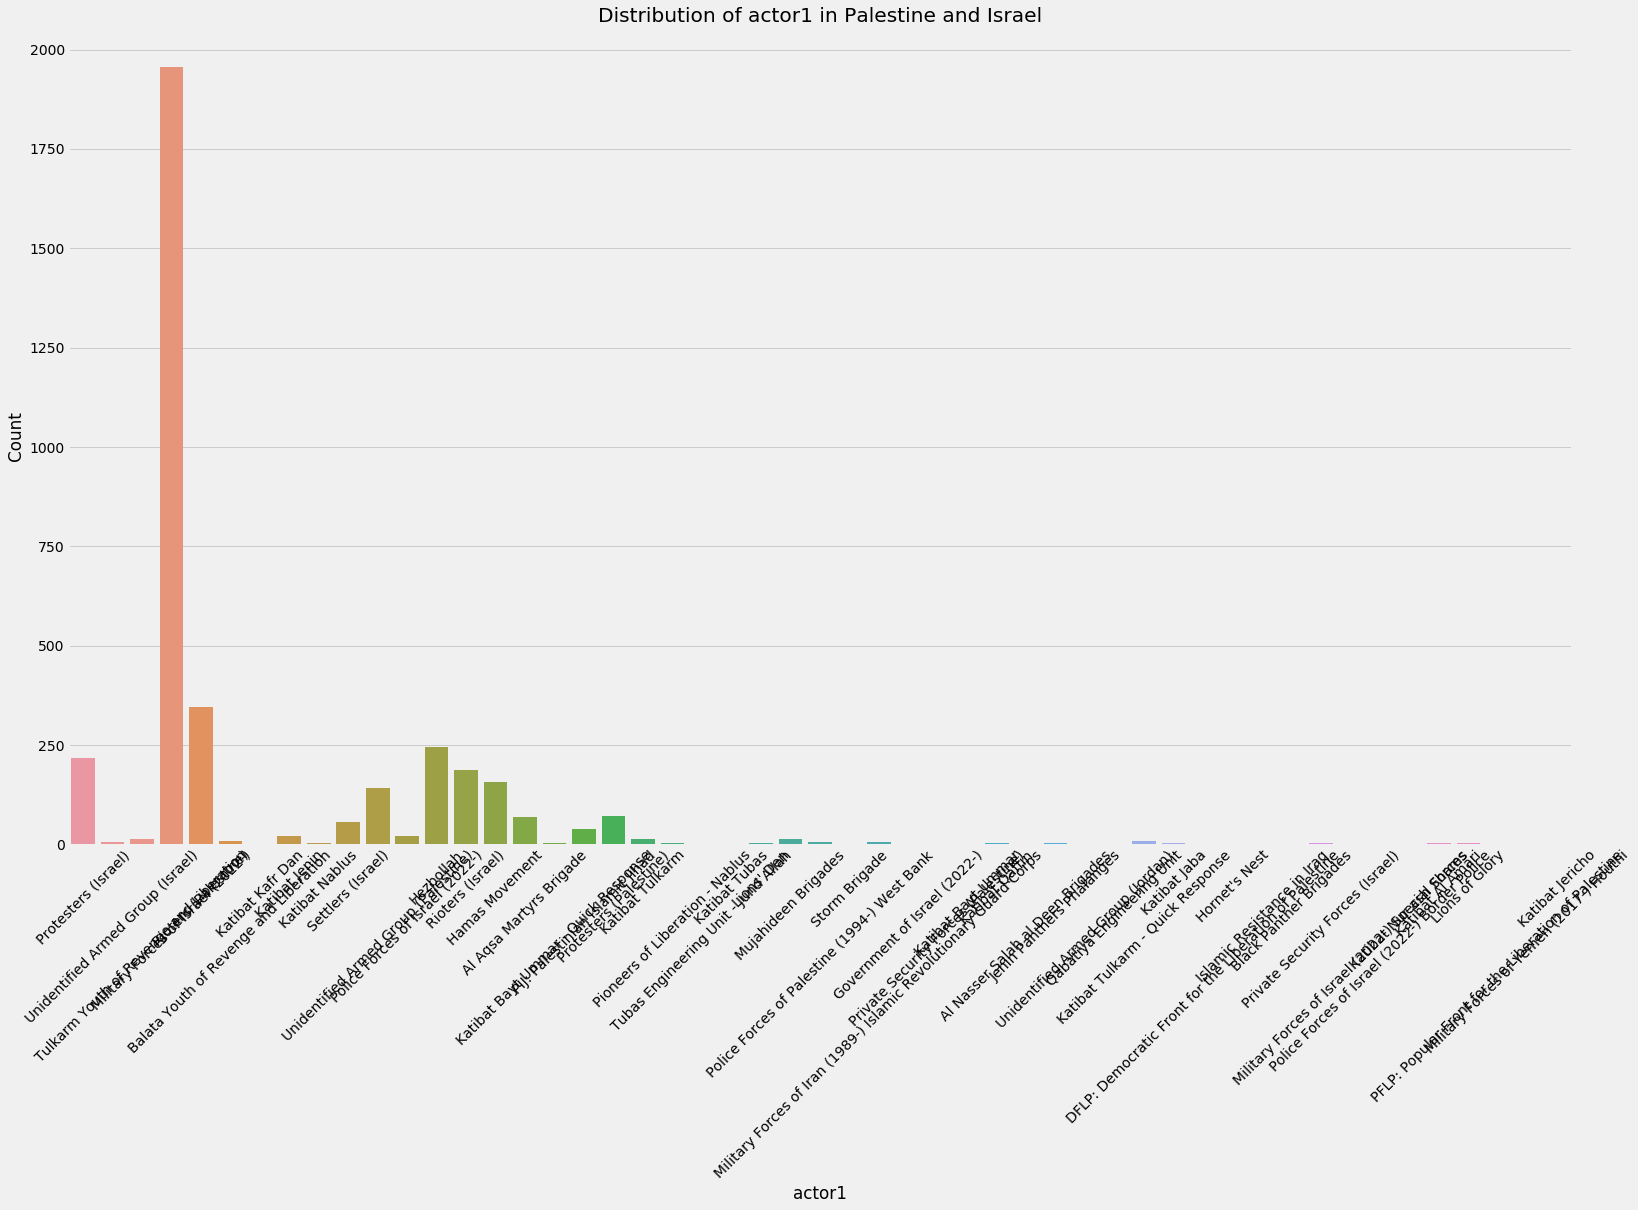

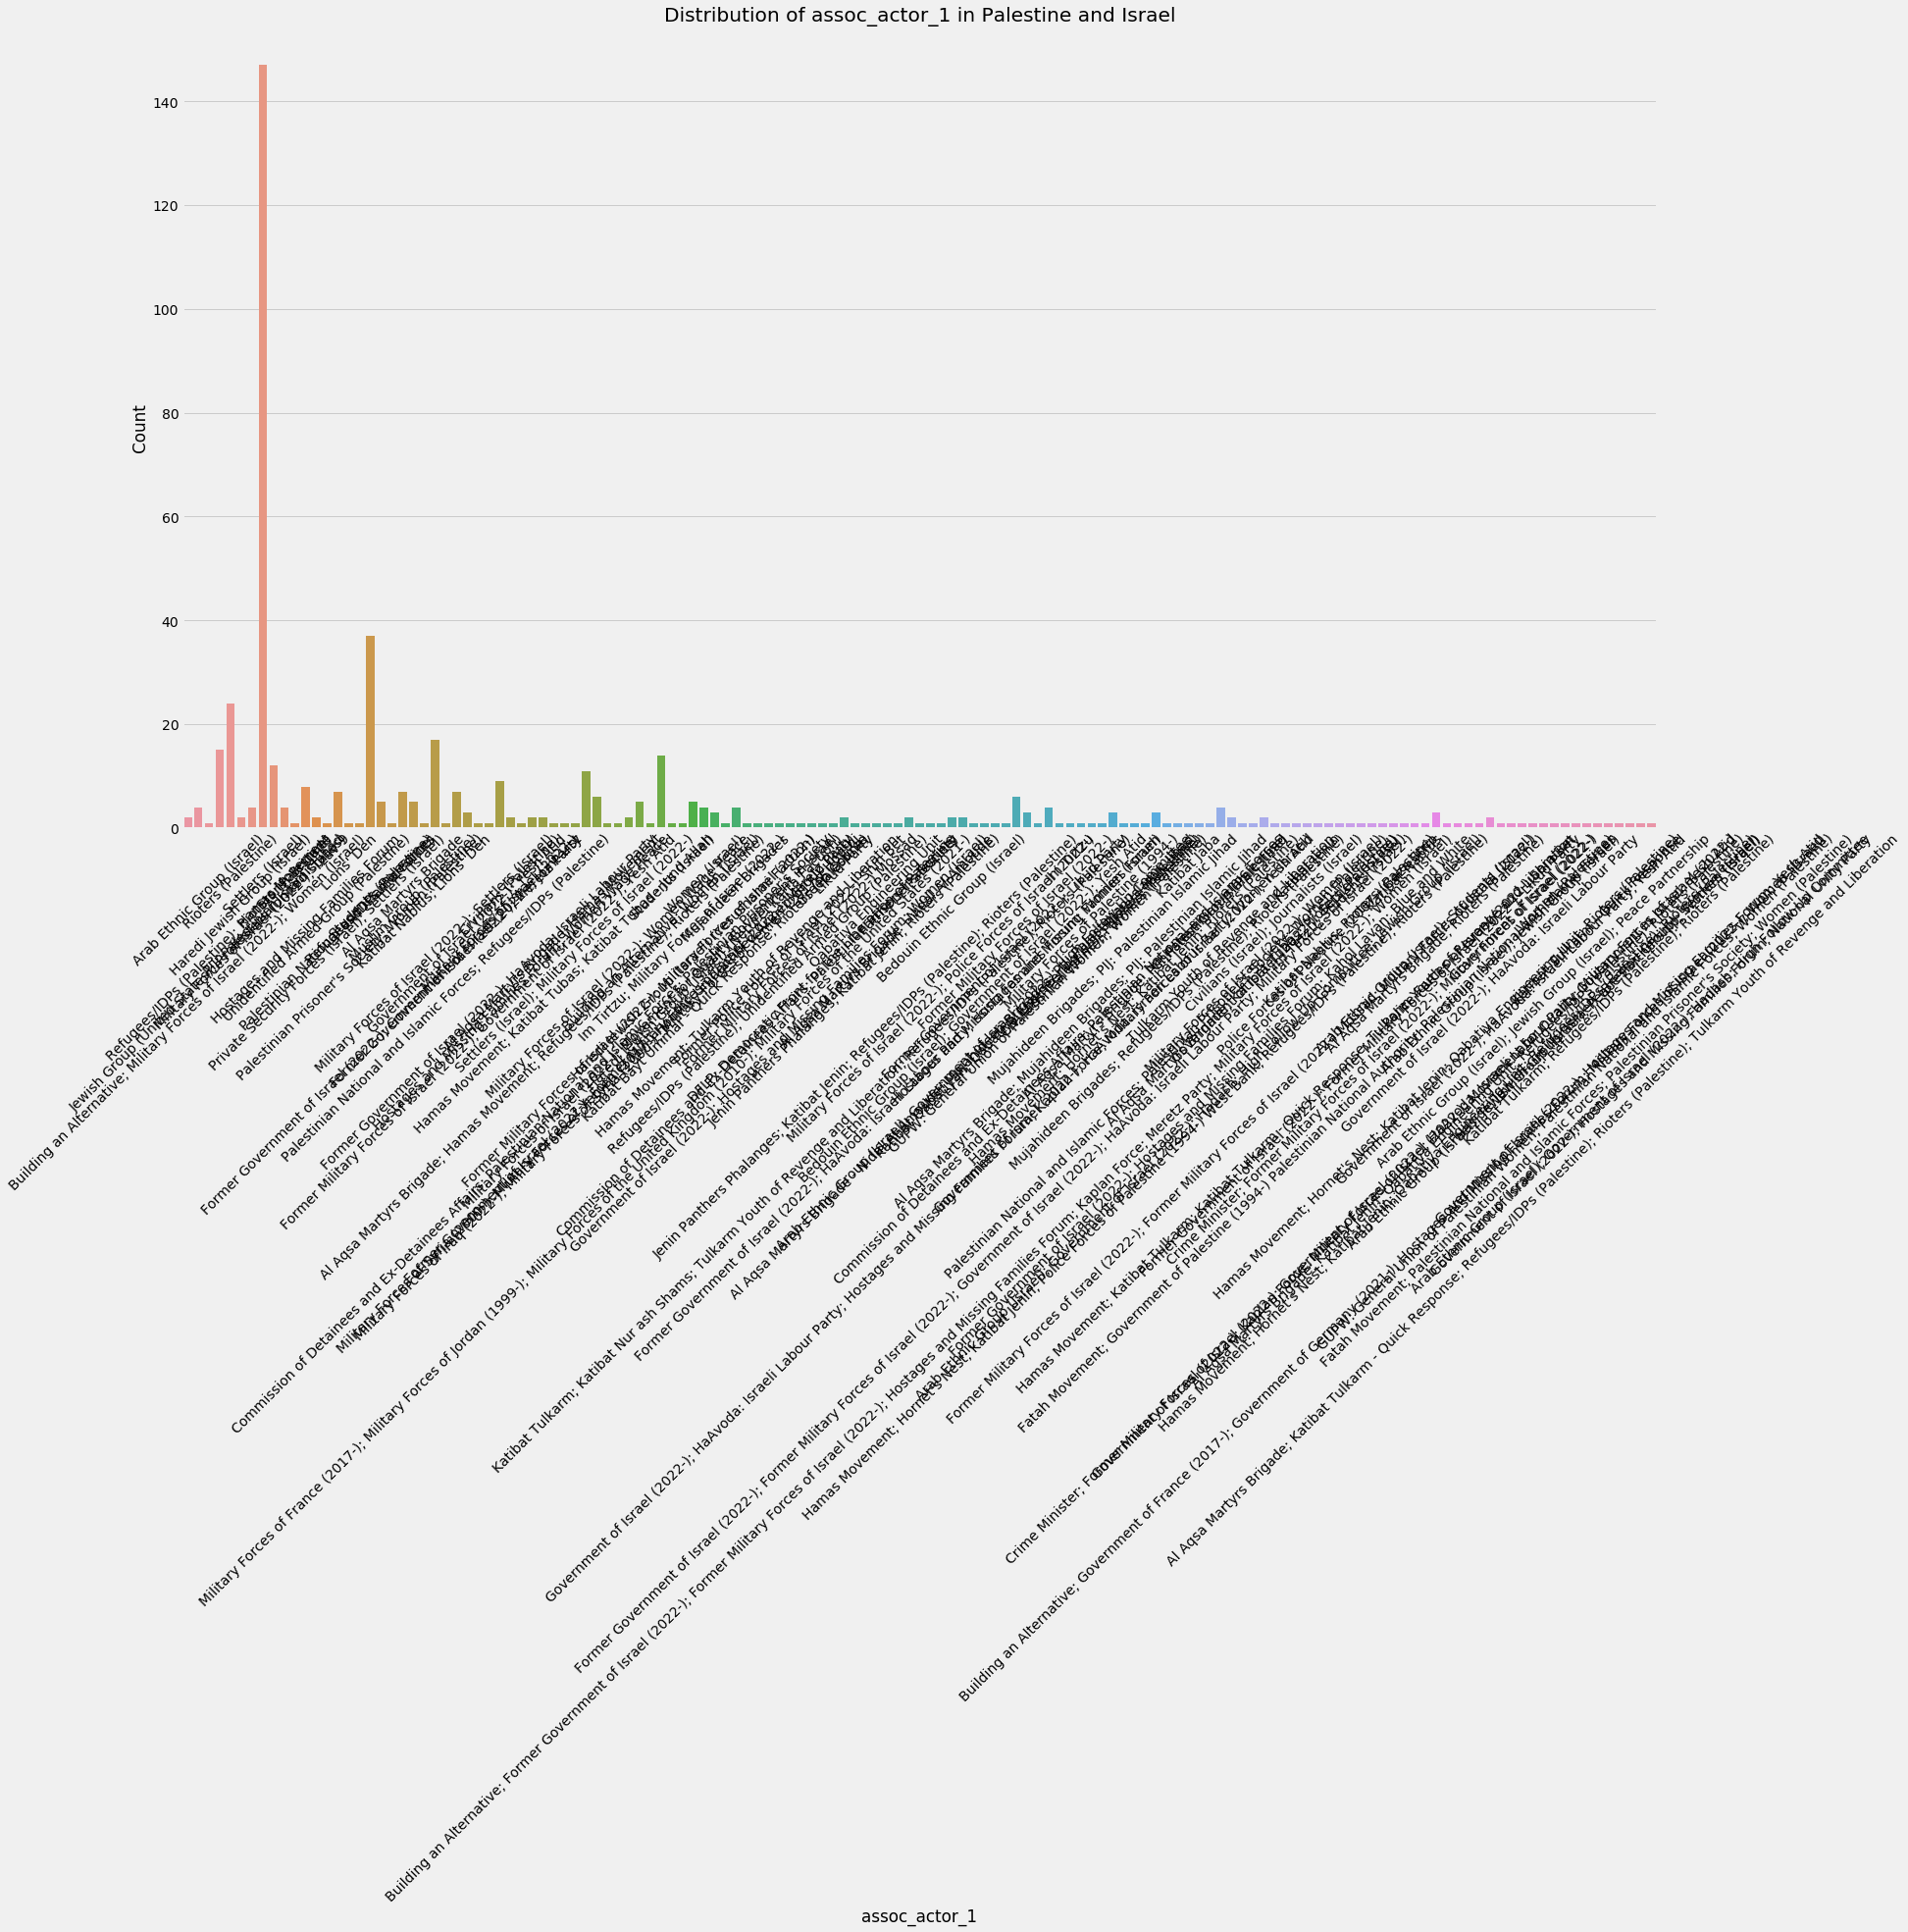

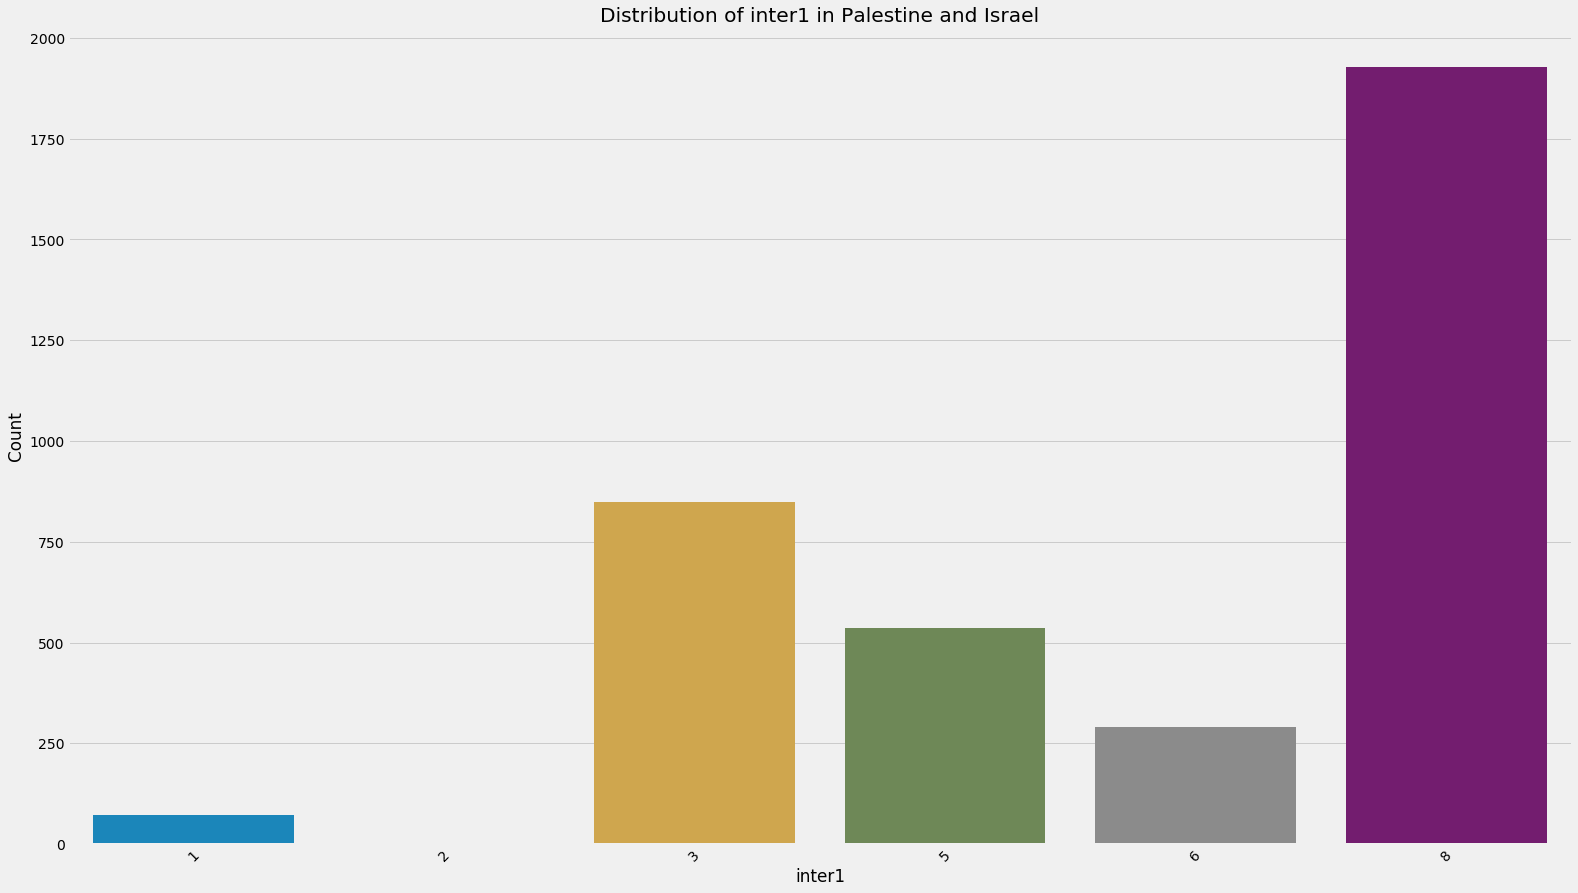

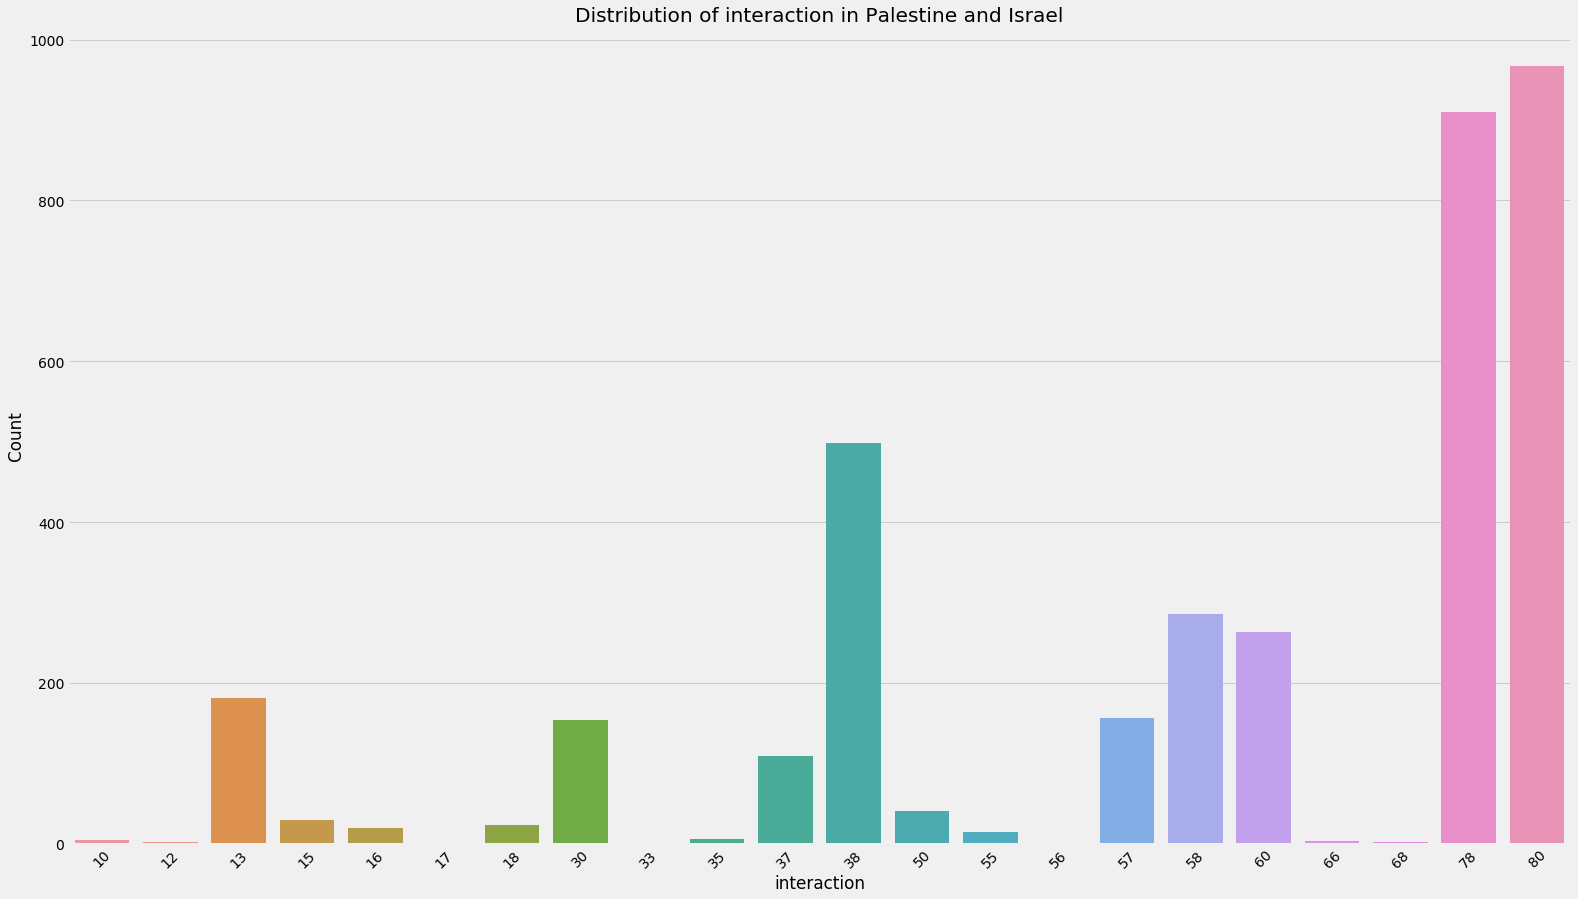

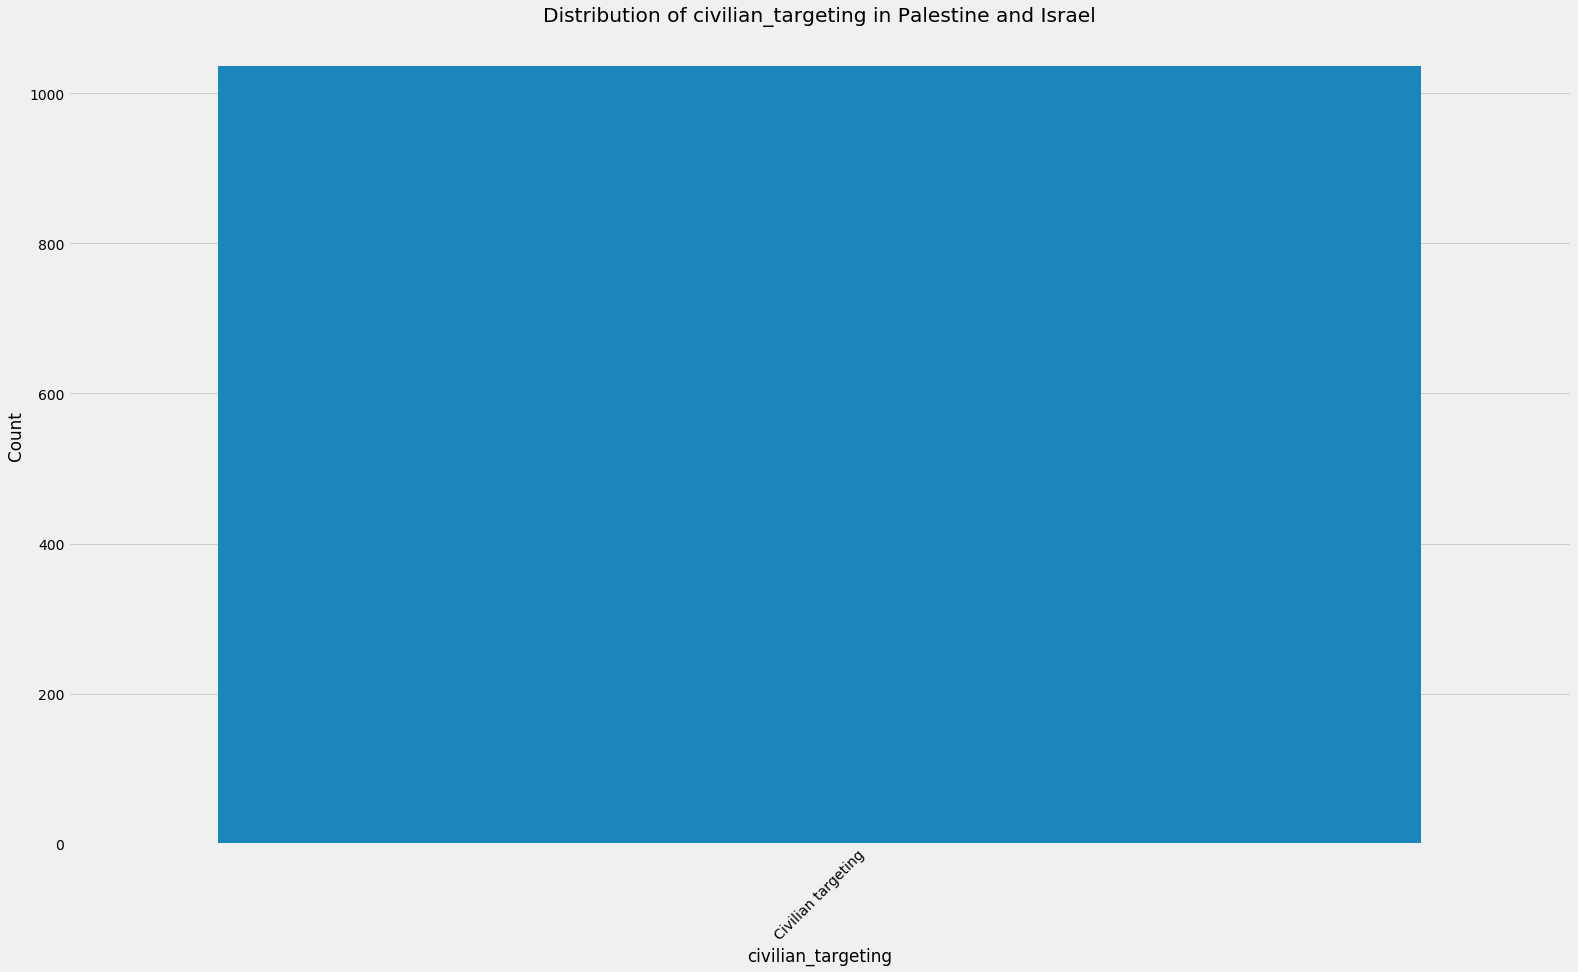

In [126]:
# Subset the data to include only events in Palestine and Israel
selected_pal_israel = ['Palestine', 'Israel']
pal_israel_data = acled_file[acled_file['country'].isin(selected_pal_israel)]

# Select relevant features
selected_features_2 = ['actor1', 'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting']

# Explore the selected features
for feature in selected_features_2:
    plt.figure(figsize=(24, 14))
    sns.countplot(x=feature, data=pal_israel_data)
    plt.title(f'Distribution of {feature} in Palestine and Israel')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1008x576 with 0 Axes>

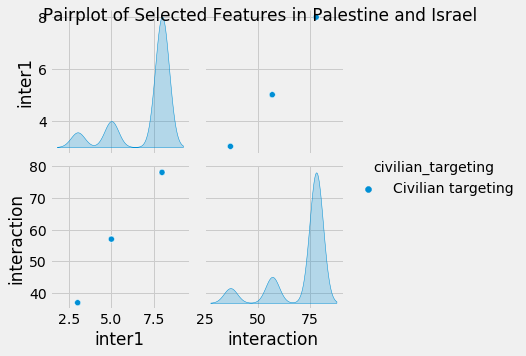

Chi-square statistic: 0.0
p-value: 1.0


In [128]:
# Visualize relationships between features
plt.figure(figsize=(14, 8))

#Swap in the subset data
sns.pairplot(pal_israel_data[selected_features_2], hue='civilian_targeting') #Refer to selected_feataures_2 above
plt.suptitle('Pairplot of Selected Features in Palestine and Israel')
plt.show()

# Statistical analysis (if needed)
# For example: Conduct chi-square test for independence between categorical variables

# Chi-square test for independence between actor1 and civilian_targeting
from scipy.stats import chi2_contingency

#Swap in subset data 
contingency_table_pal = pd.crosstab(pal_israel_data['actor1'], pal_israel_data['civilian_targeting'])
chi2, p_value, _, _ = chi2_contingency(contingency_table_pal)
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p_value}')

## I don't understand the distinction between 'disorder type' and 'sub_event_type'. 
Is political violence when the state is involved? 

In [97]:
#Plot country and Number of Events
funny = acled_file['country']

plt.figure(figsize=(15,10))
funny.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Reported Event")
plt.ylabel("Number of Events")
plt.show()

TypeError: 'int' object is not callable

<Figure size 1080x720 with 0 Axes>

## Word Cloud

In [29]:
?WordCloud

In [30]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'df' is not defined

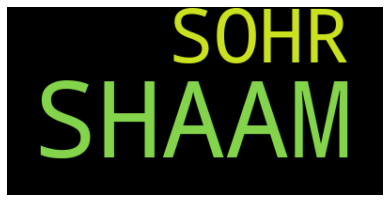

In [31]:
# Start with one source:
text = acled_file.source[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

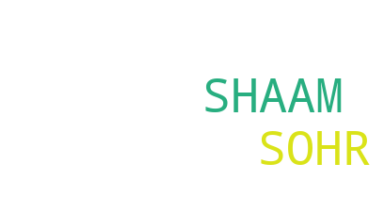

In [32]:
#Adjust to white background and making most counted source smaller in size 
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

FileNotFoundError: [Errno 2] No such file or directory: 'img/first_review.png'

### So now you'll combine all source into one big text and create a big fat cloud to see which sources are most common in these wines.
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

In [35]:
#Create a list of all the text in source column
text_in_source_column = " ".join(review for review in acled_file.source)
print ("There are {} words in the combination of all sources.".format(len(text_in_source_column)))

There are 388410 words in the combination of all sources.


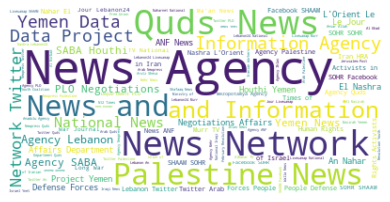

In [36]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
stopwords = nltk.corpus.stopwords.words('english') # Need to include for English dictionary 
                                                    #B/c error thrown: https://stackoverflow.com/questions/39536767/lazycorpusloader-object-is-not-iterable

# Generate a word cloud image from text_in_source_column
wordcloud_source = WordCloud(stopwords=stopwords, background_color="white").generate(text_in_source_column) #include all sources

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_source, interpolation='bilinear')
plt.axis("off")
plt.show()

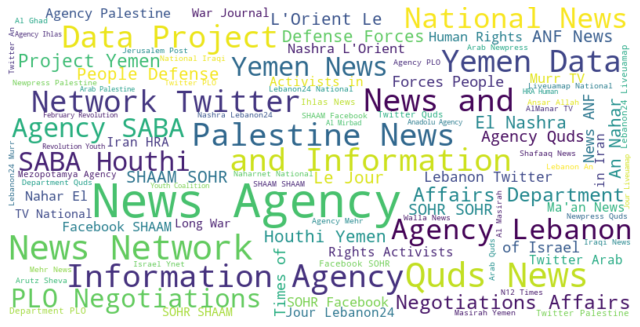

In [37]:
# Use text_in_source_column
#increase max_font_size, change the maximum number of word and lighten the background:
wordcloud_source_bigger = WordCloud(max_font_size=60, max_words=100, width=800, height=400,background_color="white").generate(text_in_source_column)
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.imshow(wordcloud_source_bigger, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word Cloud Exercise on 'notes' column

In [38]:
#check stopwords
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
#Create a list of all the text in 'notes' column
text_in_notes_column = " ".join(review for review in acled_file.notes)
print ("There are {} words in the combination of all notes.".format(len(text_in_notes_column)))

There are 2775551 words in the combination of all notes.


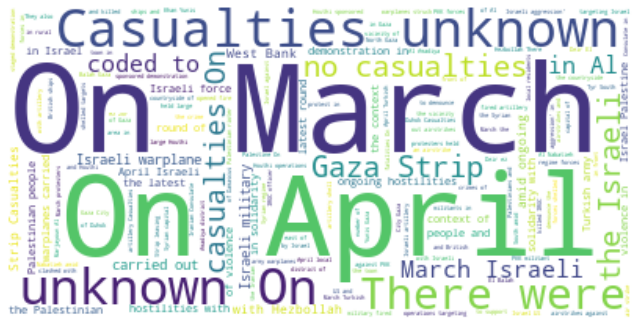

In [40]:
#update stopwords
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopwords = set(STOPWORDS)
#stopwords.update(["in", 'as','to','On','and'])

# Generate a word cloud image from text_in_notes_column
wordcloud_notes = WordCloud(stopwords=stopwords, background_color="white").generate(text_in_notes_column) #include all sources

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.imshow(wordcloud_notes, interpolation='bilinear')
plt.axis("off")
plt.show()